In [1]:
import MeCab
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib
import seaborn as sns
sns.set(font="IPAexGothic", font_scale=1.5)
import os
import warnings
warnings.simplefilter('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
pd.reset_option('display.max_rows')
pd.get_option('display.max_columns')

20

In [3]:
df = pd.read_csv('/root/data/hirosima_central.csv', encoding='utf-8')
df.head()

,サロン名,名前,性別、年齢、属性,総合,雰囲気,接客サービス,技術・仕上がり,メニュー・料金,口コミ本文
0,replay【リプレイ】,みんさん,（女性/40代/会社員）,5,5,5,5,5,店内がお洒落でした。接客も丁寧で、カラーの色合いなど提案してくれました。理想のカラーになって...
1,replay【リプレイ】,naoさん,（女性/40代）,5,5,5,5,5,久しぶりでしたが、シャンプーからカットまで全て心地よかったです。\n気に入っていなかった髪型...
2,replay【リプレイ】,mitoさん,（女性/50代/その他）,5,5,5,5,5,今回も要望通りに応えてくださってありがとうございました！サラツヤになりました。\n職場でも「...
3,replay【リプレイ】,ni-noさん,（女性/40代）,5,5,5,5,4,カラーとカットをして頂きました。カラーは白髪ぼかしという感じでハイライトを入れて頂いています...
4,replay【リプレイ】,さっちゃんさん,（女性/20代後半/パート・アルバイト）,5,5,5,5,5,今回もありがとうございました！！\nいつも接客が丁寧で気持ちよく過ごせます。\nカラーもカッ...


In [4]:
df = df[~df.口コミ本文.duplicated()]
df.reset_index(drop=True, inplace=True)

In [5]:
print("口コミ数：", len(df))

口コミ数： 12572


In [6]:
salon_num = df.サロン名.unique().size
print("サロン数：",salon_num)
kuchikomi_num = len(df)
print("1サロンあたり口コミ数:",int(kuchikomi_num/salon_num))

サロン数： 83
1サロンあたり口コミ数: 151


In [7]:
df.describe()

,総合,雰囲気,接客サービス,技術・仕上がり,メニュー・料金
count,12572.000000,12572.000000,12572.000000,12572.000000,12572.000000
mean,4.791998,4.765749,4.807270,4.789373,4.669185
std,0.565570,0.513839,0.518837,0.580917,0.620183
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5.000000,5.000000,5.000000,5.000000,4.000000
50%,5.000000,5.000000,5.000000,5.000000,5.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000


In [8]:
df_score = df.loc[:, "総合":"メニュー・料金"]
df_score.head()

,総合,雰囲気,接客サービス,技術・仕上がり,メニュー・料金
0,5,5,5,5,5
1,5,5,5,5,5
2,5,5,5,5,5
3,5,5,5,5,4
4,5,5,5,5,5


In [9]:
df_score.describe()

,総合,雰囲気,接客サービス,技術・仕上がり,メニュー・料金
count,12572.000000,12572.000000,12572.000000,12572.000000,12572.000000
mean,4.791998,4.765749,4.807270,4.789373,4.669185
std,0.565570,0.513839,0.518837,0.580917,0.620183
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5.000000,5.000000,5.000000,5.000000,4.000000
50%,5.000000,5.000000,5.000000,5.000000,5.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000


      総合
5  10561
4   1682
3    150
1     96
2     83
     雰囲気
5  10069
4   2128
3    331
1     23
2     21
   接客サービス
5   10646
4    1591
3     228
1      55
2      52
   技術・仕上がり
5    10589
4     1614
3      188
1      115
2       66
   メニュー・料金
5     9280
4     2548
3      657
2       51
1       36


Text(0.5, 1.0, '料金・メニュー')

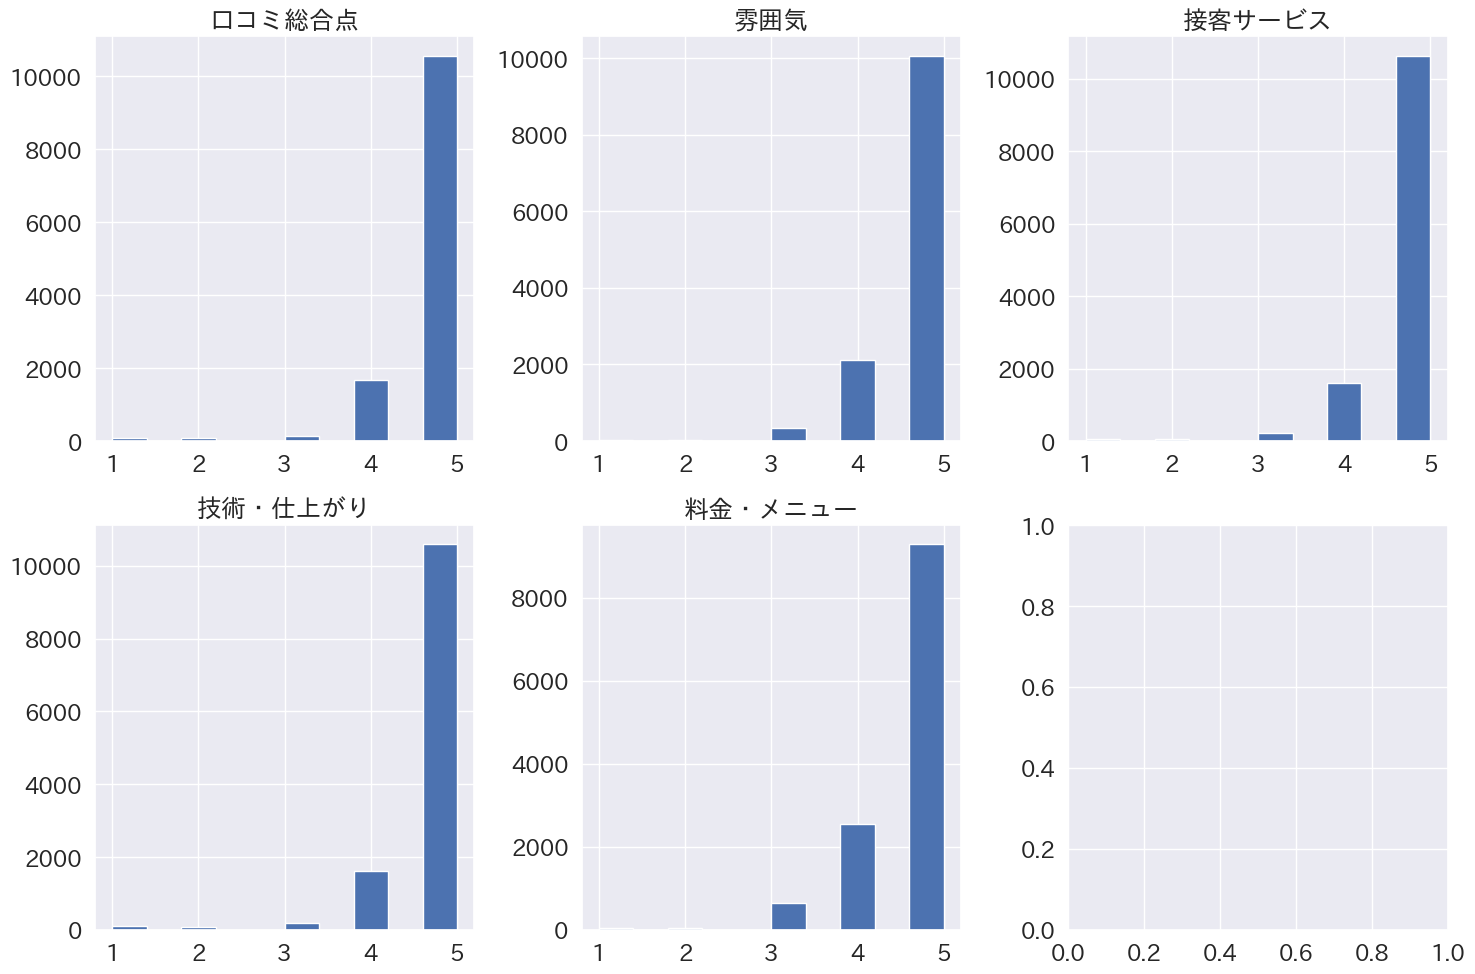

In [10]:
plt.rcParams["font.size"] = 15
print(pd.DataFrame(df_score.総合.value_counts()))
print(pd.DataFrame(df_score.雰囲気.value_counts()))
print(pd.DataFrame(df_score.接客サービス.value_counts()))
print(pd.DataFrame(df_score.iloc[:,3].value_counts()))
print(pd.DataFrame(df_score.iloc[:,4].value_counts()))

fig, ax = plt.subplots(2,3, figsize=(15,10), tight_layout=True)

ax[0,0].hist(df_score.総合)
ax[0,0].set_title("口コミ総合点")

ax[0,1].hist(df_score.雰囲気)
ax[0,1].set_title("雰囲気")

ax[0,2].hist(df_score.接客サービス)
ax[0,2].set_title("接客サービス")

ax[1,0].hist(df_score.iloc[:, 3])
ax[1,0].set_title("技術・仕上がり")

ax[1,1].hist(df_score.iloc[:, 4])
ax[1,1].set_title("料金・メニュー")


Text(0.5, 1.0, '各スコア5の数')

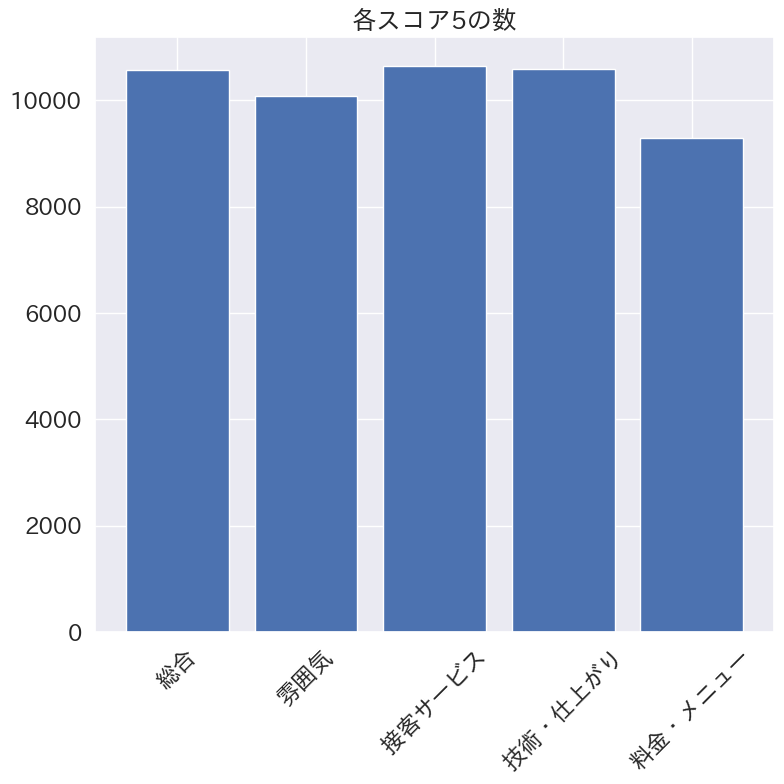

In [11]:
sougou5 = df_score.総合[df_score.総合==5].size
huniki5 = df_score.雰囲気[df_score.雰囲気==5].size
sekkyaku5 = df_score.接客サービス[df_score.接客サービス==5].size
gijyutsu5 = df_score.iloc[:, 3][df_score.iloc[:, 3]==5].size
ryoukin5 = df_score.iloc[:, 4][df_score.iloc[:, 4]==5].size

x = ["総合", "雰囲気", "接客サービス", "技術・仕上がり", "料金・メニュー"]
height = [sougou5, huniki5, sekkyaku5, gijyutsu5, ryoukin5]

plt.rcParams["font.size"]=12
figure = plt.figure(figsize=(8, 8), tight_layout=True)
plt.bar(x=x, height=height)
# plt.ylim(40000)
plt.xticks(rotation=45)
plt.title("各スコア5の数")

Text(0.5, 1.0, '各スコア4の数')

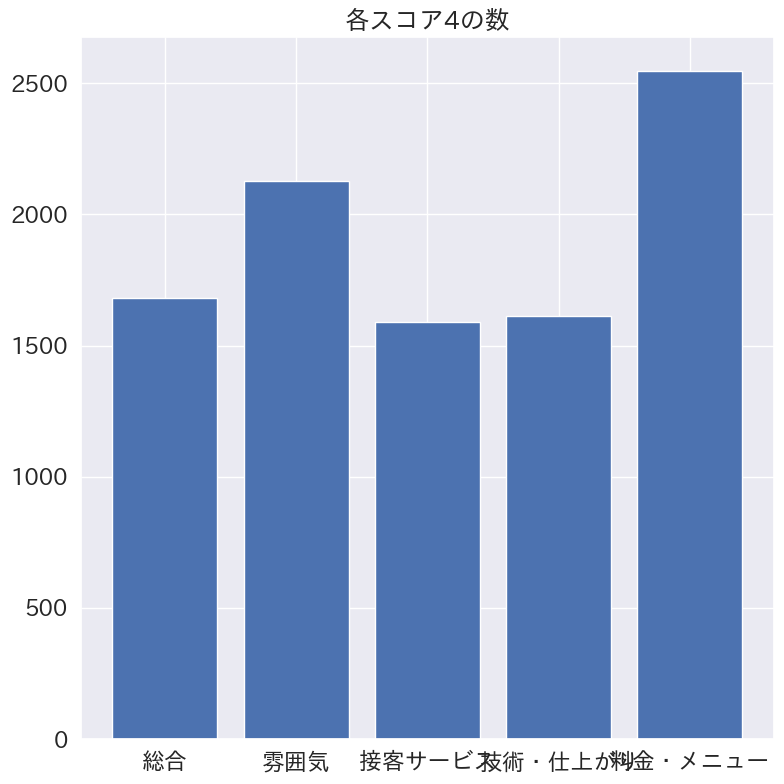

In [12]:
sougou4 = df_score.総合[df_score.総合==4].size
huniki4 = df_score.雰囲気[df_score.雰囲気==4].size
sekkyaku4 = df_score.接客サービス[df_score.接客サービス==4].size
gijyutsu4 = df_score.iloc[:, 3][df_score.iloc[:, 3]==4].size
ryoukin4 = df_score.iloc[:, 4][df_score.iloc[:, 4]==4].size

x = ["総合", "雰囲気", "接客サービス", "技術・仕上がり", "料金・メニュー"]
height = [sougou4, huniki4, sekkyaku4, gijyutsu4, ryoukin4]

plt.rcParams["font.size"]=12
figure = plt.figure(figsize=(8, 8), tight_layout=True)
plt.bar(x=x, height=height)
# plt.ylim(55000)
plt.title("各スコア4の数")

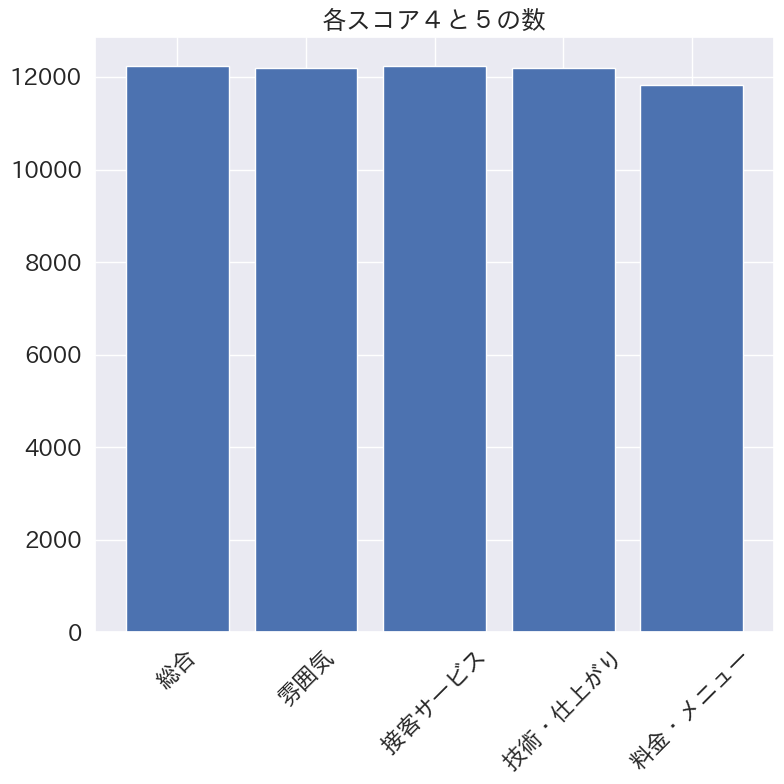

In [13]:
sougou4_5 = df_score.総合[(df_score.総合==4) | (df_score.総合==5)].size
huniki4_5 = df_score.雰囲気[(df_score.雰囲気==4) | (df_score.雰囲気==5)].size
sekkyaku4_5 = df_score.接客サービス[(df_score.接客サービス==4) | (df_score.接客サービス==5)].size
gijyutsu4_5 = df_score.iloc[:, 3][(df_score.iloc[:, 3]==4)| (df_score.iloc[:, 3]==5)].size
ryoukin4_5 = df_score.iloc[:, 4][(df_score.iloc[:, 4]==4) | (df_score.iloc[:, 4]==5)].size

x = ["総合", "雰囲気", "接客サービス", "技術・仕上がり", "料金・メニュー"]
height = [sougou4_5, huniki4_5, sekkyaku4_5, gijyutsu4_5, ryoukin4_5]

plt.rcParams["font.size"]=12
figure = plt.figure(figsize=(8, 8), tight_layout=True)
plt.bar(x=x, height=height)
# plt.ylim(50000)
plt.title("各スコア４と５の数")
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, '各スコア1の数')

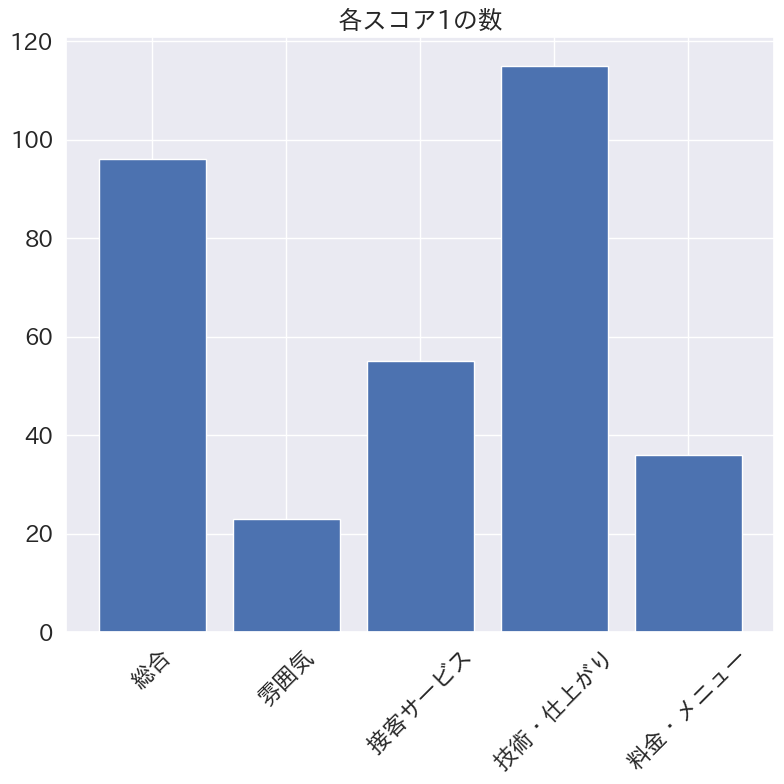

In [14]:
sougou1 = df_score.総合[df_score.総合==1].size
huniki1 = df_score.雰囲気[df_score.雰囲気==1].size
sekkyaku1 = df_score.接客サービス[df_score.接客サービス==1].size
gijyutsu1 = df_score.iloc[:, 3][df_score.iloc[:, 3]==1].size
ryoukin1 = df_score.iloc[:, 4][df_score.iloc[:, 4]==1].size

x = ["総合", "雰囲気", "接客サービス", "技術・仕上がり", "料金・メニュー"]
height = [sougou1, huniki1, sekkyaku1, gijyutsu1, ryoukin1]

plt.rcParams["font.size"]=12
figure = plt.figure(figsize=(8, 8), tight_layout=True)
plt.bar(x=x, height=height)
# plt.ylim(100)
plt.xticks(rotation=45)
plt.title("各スコア1の数")

Text(0.5, 1.0, '各スコア2の数')

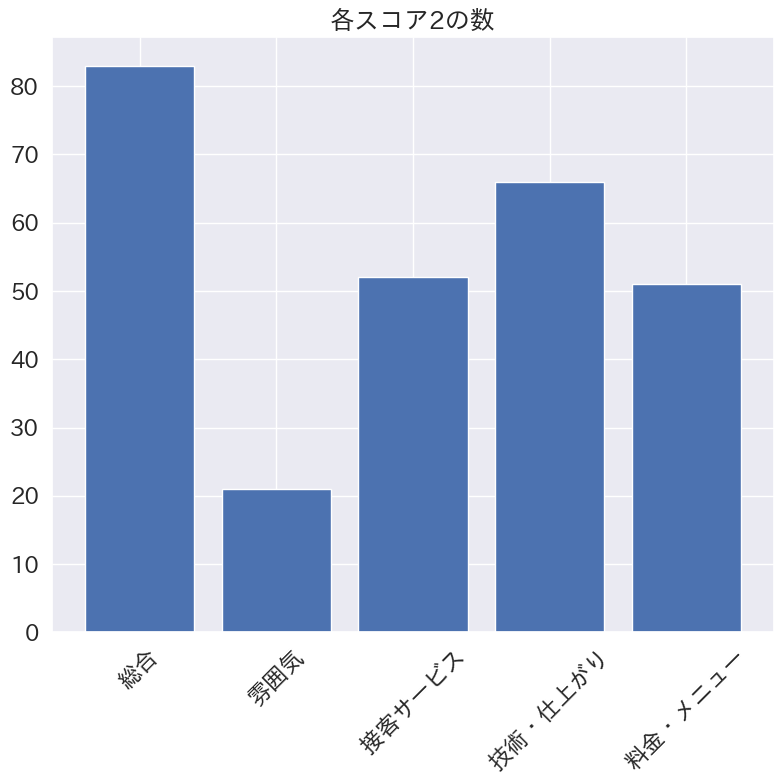

In [15]:
sougou2 = df_score.総合[df_score.総合==2].size
huniki2 = df_score.雰囲気[df_score.雰囲気==2].size
sekkyaku2 = df_score.接客サービス[df_score.接客サービス==2].size
gijyutsu2 = df_score.iloc[:, 3][df_score.iloc[:, 3]==2].size
ryoukin2 = df_score.iloc[:, 4][df_score.iloc[:, 4]==2].size

x = ["総合", "雰囲気", "接客サービス", "技術・仕上がり", "料金・メニュー"]
height = [sougou2, huniki2, sekkyaku2, gijyutsu2, ryoukin2]

plt.rcParams["font.size"]=12
figure = plt.figure(figsize=(8, 8), tight_layout=True)
plt.bar(x=x, height=height)
# plt.ylim(55000)
plt.xticks(rotation=45)
plt.title("各スコア2の数")

Text(0.5, 1.0, '各スコア3の数')

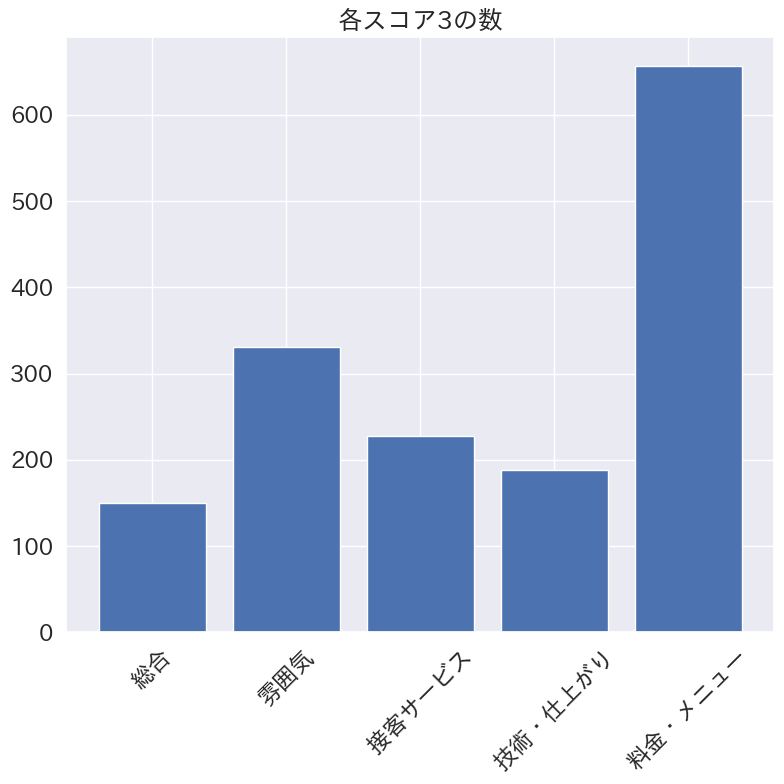

In [16]:
sougou3 = df_score.総合[df_score.総合==3].size
huniki3 = df_score.雰囲気[df_score.雰囲気==3].size
sekkyaku3 = df_score.接客サービス[df_score.接客サービス==3].size
gijyutsu3 = df_score.iloc[:, 3][df_score.iloc[:, 3]==3].size
ryoukin3 = df_score.iloc[:, 4][df_score.iloc[:, 4]==3].size

x = ["総合", "雰囲気", "接客サービス", "技術・仕上がり", "料金・メニュー"]
height = [sougou3, huniki3, sekkyaku3, gijyutsu3, ryoukin3]

plt.rcParams["font.size"]=12
figure = plt.figure(figsize=(8, 8), tight_layout=True)
plt.bar(x=x, height=height)
plt.xticks(rotation=45)
# plt.ylim(55000)
plt.title("各スコア3の数")

Text(0.5, 1.0, '各スコア1と2の数')

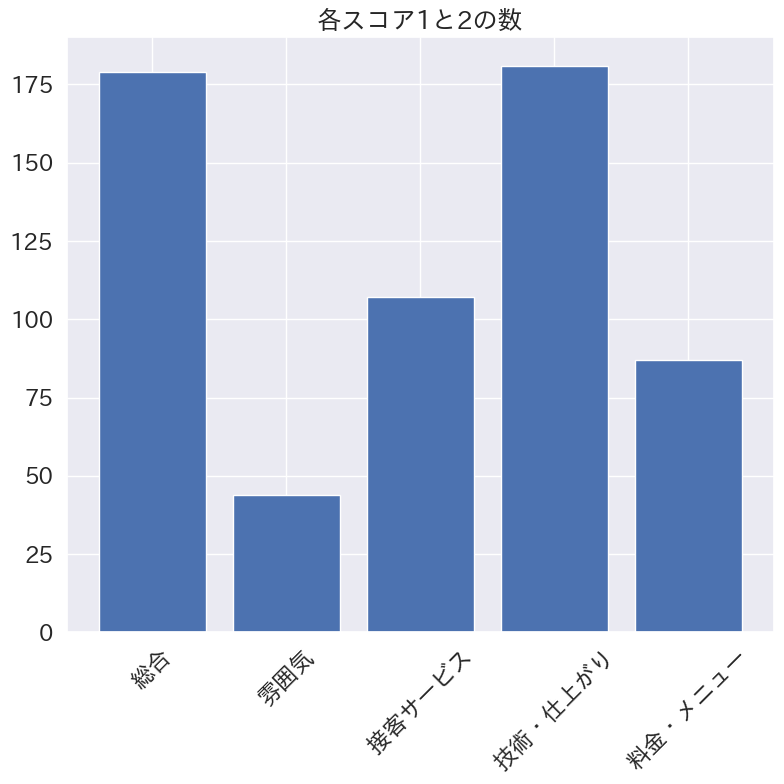

In [17]:
sougou1_2 = df_score.総合[(df_score.総合==1)|(df_score.総合==2)].size
huniki1_2 = df_score.雰囲気[(df_score.雰囲気==1)|(df_score.雰囲気==2)].size
sekkyaku1_2 = df_score.接客サービス[(df_score.接客サービス==1)|(df_score.接客サービス==2)].size
gijyutsu1_2 = df_score.iloc[:, 3][(df_score.iloc[:, 3]==1)|(df_score.iloc[:, 3]==2)].size
ryoukin1_2 = df_score.iloc[:, 4][(df_score.iloc[:, 4]==1)|(df_score.iloc[:, 4]==2)].size

x = ["総合", "雰囲気", "接客サービス", "技術・仕上がり", "料金・メニュー"]
height = [sougou1_2, huniki1_2, sekkyaku1_2, gijyutsu1_2, ryoukin1_2]

plt.rcParams["font.size"]=12
figure = plt.figure(figsize=(8, 8), tight_layout=True)
plt.bar(x=x, height=height)
# plt.ylim(800)
plt.xticks(rotation=45)
plt.title("各スコア1と2の数")

Text(0.5, 1.0, '各スコア1と2の3の数')

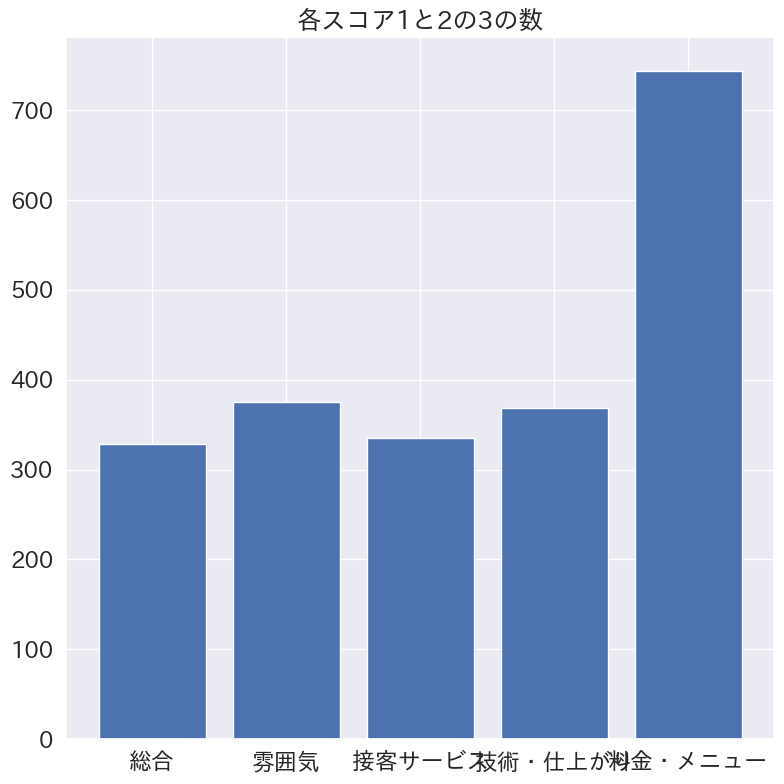

In [18]:
sougou1_2_3 = df_score.総合[(df_score.総合==1)|(df_score.総合==2)|(df_score.総合==3)].size
huniki1_2_3 = df_score.雰囲気[(df_score.雰囲気==1)|(df_score.雰囲気==2)|(df_score.雰囲気==3)].size
sekkyaku1_2_3 = df_score.接客サービス[(df_score.接客サービス==1)|(df_score.接客サービス==2)|(df_score.接客サービス==3)].size
gijyutsu1_2_3 = df_score.iloc[:, 3][(df_score.iloc[:, 3]==1)|(df_score.iloc[:, 3]==2)|(df_score.iloc[:, 3]==3)].size
ryoukin1_2_3 = df_score.iloc[:, 4][(df_score.iloc[:, 4]==1)|(df_score.iloc[:, 4]==2)|(df_score.iloc[:, 4]==3)].size

x = ["総合", "雰囲気", "接客サービス", "技術・仕上がり", "料金・メニュー"]
height = [sougou1_2_3, huniki1_2_3, sekkyaku1_2_3, gijyutsu1_2_3, ryoukin1_2_3]

plt.rcParams["font.size"]=12
figure = plt.figure(figsize=(8, 8), tight_layout=True)
plt.bar(x=x, height=height)
# plt.ylim(2000)
plt.title("各スコア1と2の3の数")

In [19]:
#相関係数。総合点に一番影響を与えているのは「技術・仕上がり」、その後に「接客サービス」である。
df_score.corr()

,総合,雰囲気,接客サービス,技術・仕上がり,メニュー・料金
総合,1.000000,0.683340,0.794024,0.845775,0.652004
雰囲気,0.683340,1.000000,0.724592,0.593406,0.565082
接客サービス,0.794024,0.724592,1.000000,0.707235,0.567966
技術・仕上がり,0.845775,0.593406,0.707235,1.000000,0.580922
メニュー・料金,0.652004,0.565082,0.567966,0.580922,1.000000


In [20]:
df_sex_age_attr = df["性別、年齢、属性"].str.replace("（", "").str.replace("）", "").str.split("/", expand=True)
df_sex_age_attr.rename(columns={0:"性別",1:"年齢",2:"属性"}, inplace=True)
df_sex_age_attr

,性別,年齢,属性
0,女性,40代,会社員
1,女性,40代,None
2,女性,50代,その他
3,女性,40代,None
4,女性,20代後半,パート・アルバイト
...,...,...,...
12567,女性,30代前半,None
12568,女性,30代前半,会社員
12569,女性,50代,None
12570,女性,50代,その他


In [21]:
df_update = pd.concat([df,df_sex_age_attr], axis=1).drop(columns="性別、年齢、属性")
df_update.rename(columns={"技術・仕上がり":"技術、仕上がり", "メニュー・料金":"メニュー、料金"}, inplace=True)
df_update.reindex(columns=["サロン名", "名前", "性別", "年齢", "属性", "総合", "雰囲気", "接客サービス", "技術、仕上がり", "メニュー、料金","口コミ本文"])

,サロン名,名前,性別,年齢,属性,総合,雰囲気,接客サービス,技術、仕上がり,メニュー、料金,口コミ本文
0,replay【リプレイ】,みんさん,女性,40代,会社員,5,5,5,5,5,店内がお洒落でした。接客も丁寧で、カラーの色合いなど提案してくれました。理想のカラーになって...
1,replay【リプレイ】,naoさん,女性,40代,None,5,5,5,5,5,久しぶりでしたが、シャンプーからカットまで全て心地よかったです。\n気に入っていなかった髪型...
2,replay【リプレイ】,mitoさん,女性,50代,その他,5,5,5,5,5,今回も要望通りに応えてくださってありがとうございました！サラツヤになりました。\n職場でも「...
3,replay【リプレイ】,ni-noさん,女性,40代,None,5,5,5,5,4,カラーとカットをして頂きました。カラーは白髪ぼかしという感じでハイライトを入れて頂いています...
4,replay【リプレイ】,さっちゃんさん,女性,20代後半,パート・アルバイト,5,5,5,5,5,今回もありがとうございました！！\nいつも接客が丁寧で気持ちよく過ごせます。\nカラーもカッ...
...,...,...,...,...,...,...,...,...,...,...,...
12567,ROTO,りーさん,女性,30代前半,None,5,5,5,5,5,縮毛矯正をして1週間経ちますが、毎日の手入れが楽になって大満足です^^*キレイに縮毛をかけて...
12568,nike【ニケ】,ねいさん,女性,30代前半,会社員,5,5,5,5,5,今までうけたヘッドスパの中で1番すっきりしました！\n肩こりや頭痛、不眠に悩んで、色々なマッ...
12569,coquelicot【コクリコ】,和ちゃんさん,女性,50代,None,4,4,4,4,4,沢山気をつかわせてしまってごめんなさい\nスッキリしました。主人に誉められました。ありがとう...
12570,coquelicot【コクリコ】,和ちゃんさん,女性,50代,その他,4,4,4,3,3,いつも無理なお願いを聞いて頂いてありがとうございます。居心地のいい雰囲気が気にいってます。\...


In [22]:
list_sex = df_update.性別.value_counts().drop("未設定").tolist()
print(list_sex)
list_age = df_update.年齢.value_counts().drop(["未設定", "70代～", "～10代前半"]).tolist()
print(df_update.年齢.value_counts())
print(list_age) #"未設定", "70代～", "～10代前半"を削除

[11244, 1319]
20代前半     2530
20代後半     2347
40代       2255
30代前半     1589
50代       1378
30代後半     1279
10代後半      950
60代        200
未設定         24
70代～        13
～10代前半       7
Name: 年齢, dtype: int64
[2530, 2347, 2255, 1589, 1378, 1279, 950, 200]


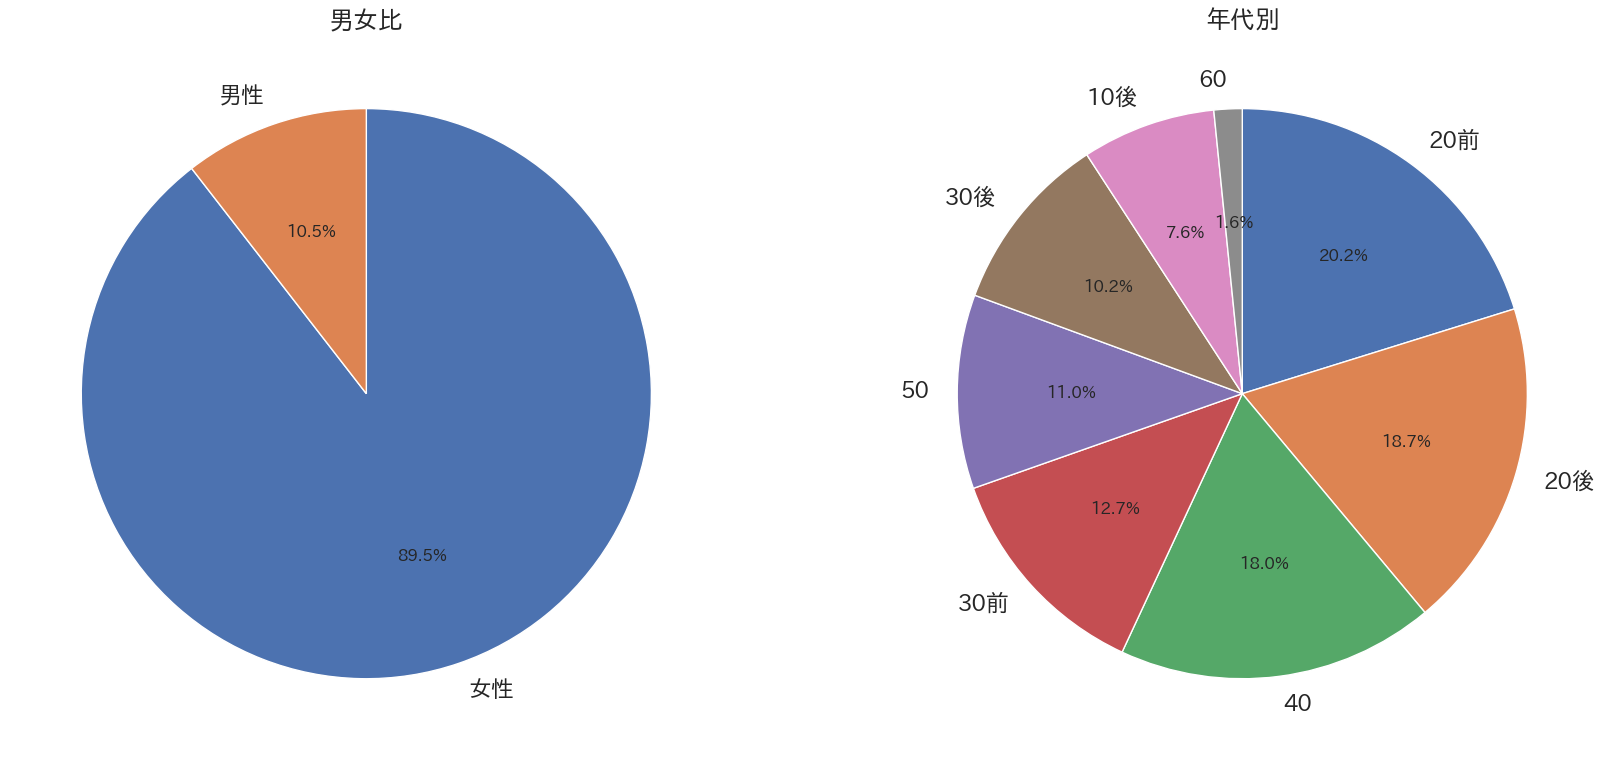

In [23]:
fig, ax = plt.subplots(1,2, figsize=(18,8), tight_layout=True)
ax[0].pie(list_sex, labels=["女性", "男性"], startangle=90, counterclock=False, autopct="%1.1f%%")
ax[0].set_title("男女比")

ax[1].pie(list_age, labels=["20前","20後","40","30前","50","30後","10後","60"], startangle=90, counterclock=False, autopct="%1.1f%%")
ax[1].set_title("年代別")
plt.rcParams["font.size"] = 20
plt.show()

In [24]:
nakaku_otona = df_update.年齢[(df_update.年齢=="30代後半") | (df_update.年齢=="40代") | (df_update.年齢=="50代")]
nakaku_otona_num = nakaku_otona.size

In [25]:
df_age_Series_with_otona = df_update.年齢.value_counts().drop(["30代後半", "40代", "50代"]).append(pd.Series([nakaku_otona_num], index=["大人世代"]))
df_age_Series_with_otona.rename("年齢", inplace=True)

20代前半     2530
20代後半     2347
30代前半     1589
10代後半      950
60代        200
未設定         24
70代～        13
～10代前半       7
大人世代      4912
Name: 年齢, dtype: int64

In [26]:
temp_Series = df_age_Series_with_otona.sort_values(ascending=False).drop(["未設定", "70代～", "～10代前半"])
temp_l = df_age_Series_with_otona.sort_values(ascending=False).drop(["未設定", "70代～", "～10代前半"]).tolist()
print(temp_Series)
print(temp_l)

大人世代     4912
20代前半    2530
20代後半    2347
30代前半    1589
10代後半     950
60代       200
Name: 年齢, dtype: int64
[4912, 2530, 2347, 1589, 950, 200]


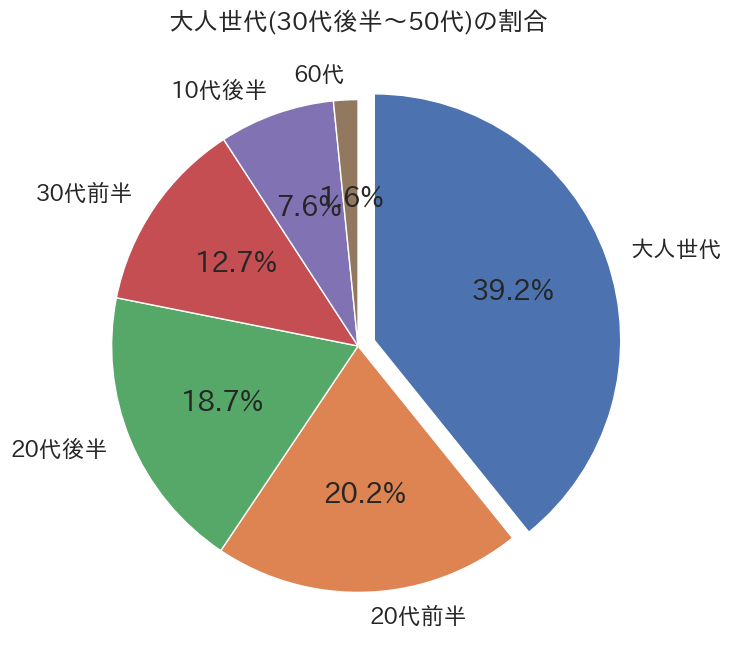

In [27]:
plt.figure(figsize=(10,8))
plt.pie(temp_l, labels=temp_Series.index, counterclock=False, startangle=90,explode=[0.07, 0, 0, 0, 0, 0], autopct="%1.1f%%")
# for t in text:
#     t.set_horizontalaligment("center")
#     t.set_size(18)
plt.title("大人世代(30代後半〜50代)の割合")
plt.show()

# patches, texts = plt.pie(x, labels=label, counterclock=False, startangle=90,
#                          labeldistance=0.6,
#                          textprops={'color': "white", 'weight': "bold"})
# for t in texts:
#   t.set_horizontalalignment('center')
#   t.set_size(18)

In [28]:
ss = StandardScaler()

df_score_std = pd.DataFrame(ss.fit_transform(df_score), columns=df_score.columns)
df_score_std.head()

,総合,雰囲気,接客サービス,技術・仕上がり,メニュー・料金
0,0.367789,0.455901,0.37148,0.362591,0.533436
1,0.367789,0.455901,0.37148,0.362591,0.533436
2,0.367789,0.455901,0.37148,0.362591,0.533436
3,0.367789,0.455901,0.37148,0.362591,-1.079056
4,0.367789,0.455901,0.37148,0.362591,0.533436


In [29]:
#標準化ありのXのエルボー法
k_list_std = range(1, 10)
sse_list_std = []
for k in k_list_std:
    model = KMeans(n_clusters=k, random_state=0)
    model = model.fit(df_score_std)
    sse_list_std.append(model.inertia_) #inertia_各クラスタ内の二乗誤差

k_list = range(1,10)
sse_list = []
for k in k_list:
    model = KMeans(n_clusters=k, random_state=0)
    model = model.fit(df_score)
    sse_list.append(model.inertia_)

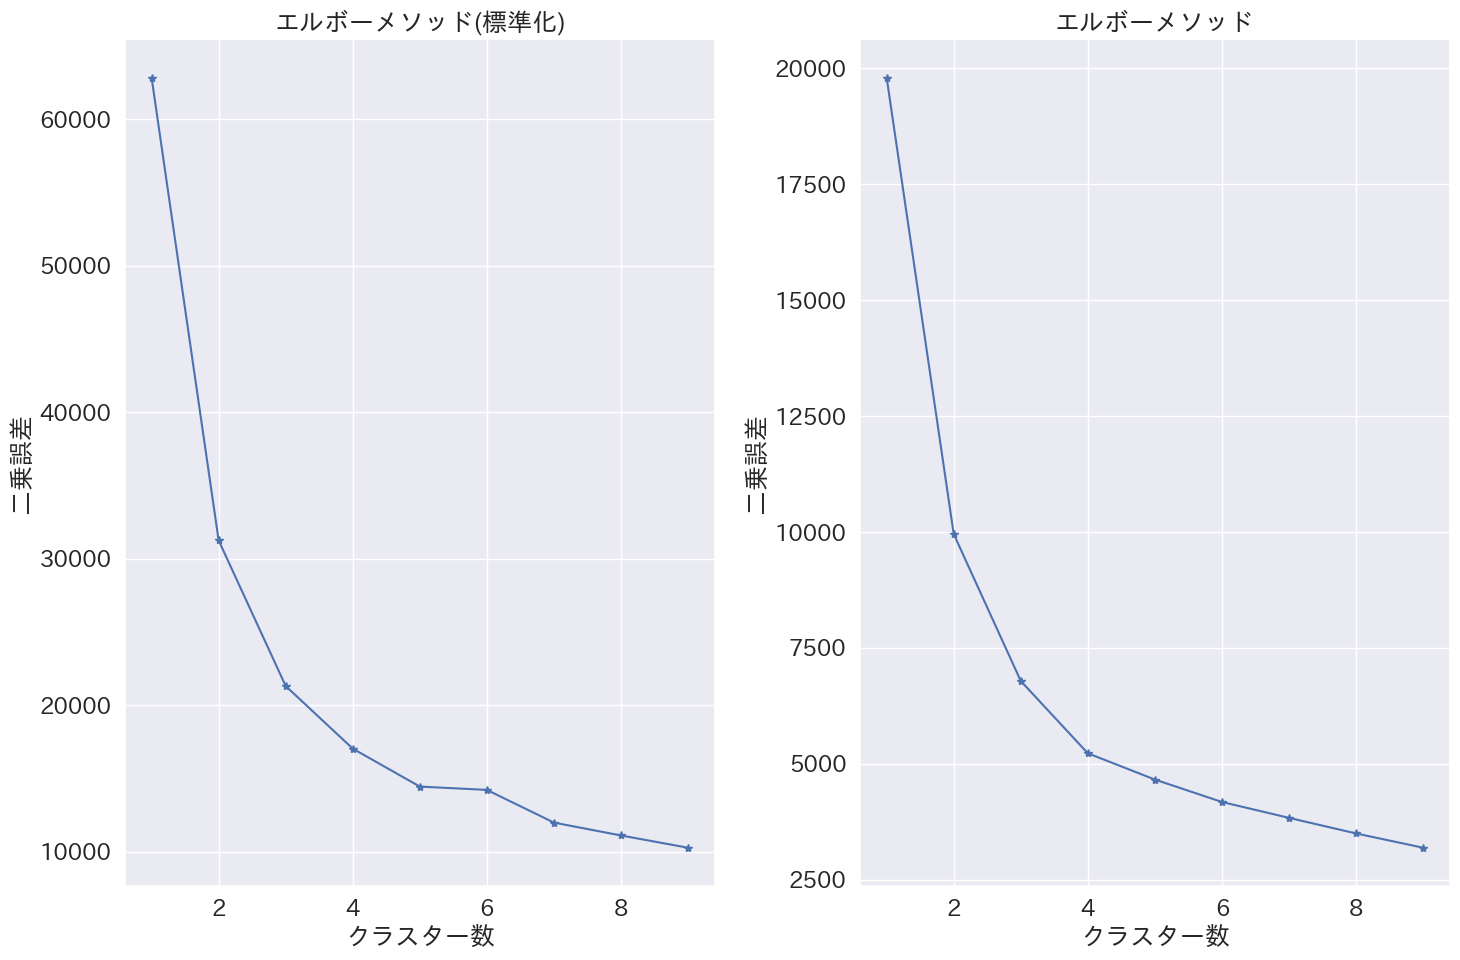

In [30]:
fig = plt.figure(figsize=(15,10), tight_layout=True)

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("エルボーメソッド(標準化)")
ax1.set_xlabel("クラスター数")
ax1.set_ylabel("二乗誤差")
ax1.plot(k_list_std, sse_list_std, marker='*')

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("エルボーメソッド")
ax2.set_xlabel("クラスター数")
ax2.set_ylabel("二乗誤差")
ax2.plot(k_list, sse_list, marker='*')

In [31]:
#総合点なし。

#標準化ありのXのエルボー法
k_list_std = range(1, 10)
sse_list_std = []
for k in k_list_std:
    model = KMeans(n_clusters=k, random_state=0)
    model = model.fit(df_score_std.iloc[:, 1:])
    sse_list_std.append(model.inertia_)

k_list = range(1,10)
sse_list = []
for k in k_list:
    model = KMeans(n_clusters=k, random_state=0)
    model = model.fit(df_score.iloc[:, 1:])
    sse_list.append(model.inertia_)

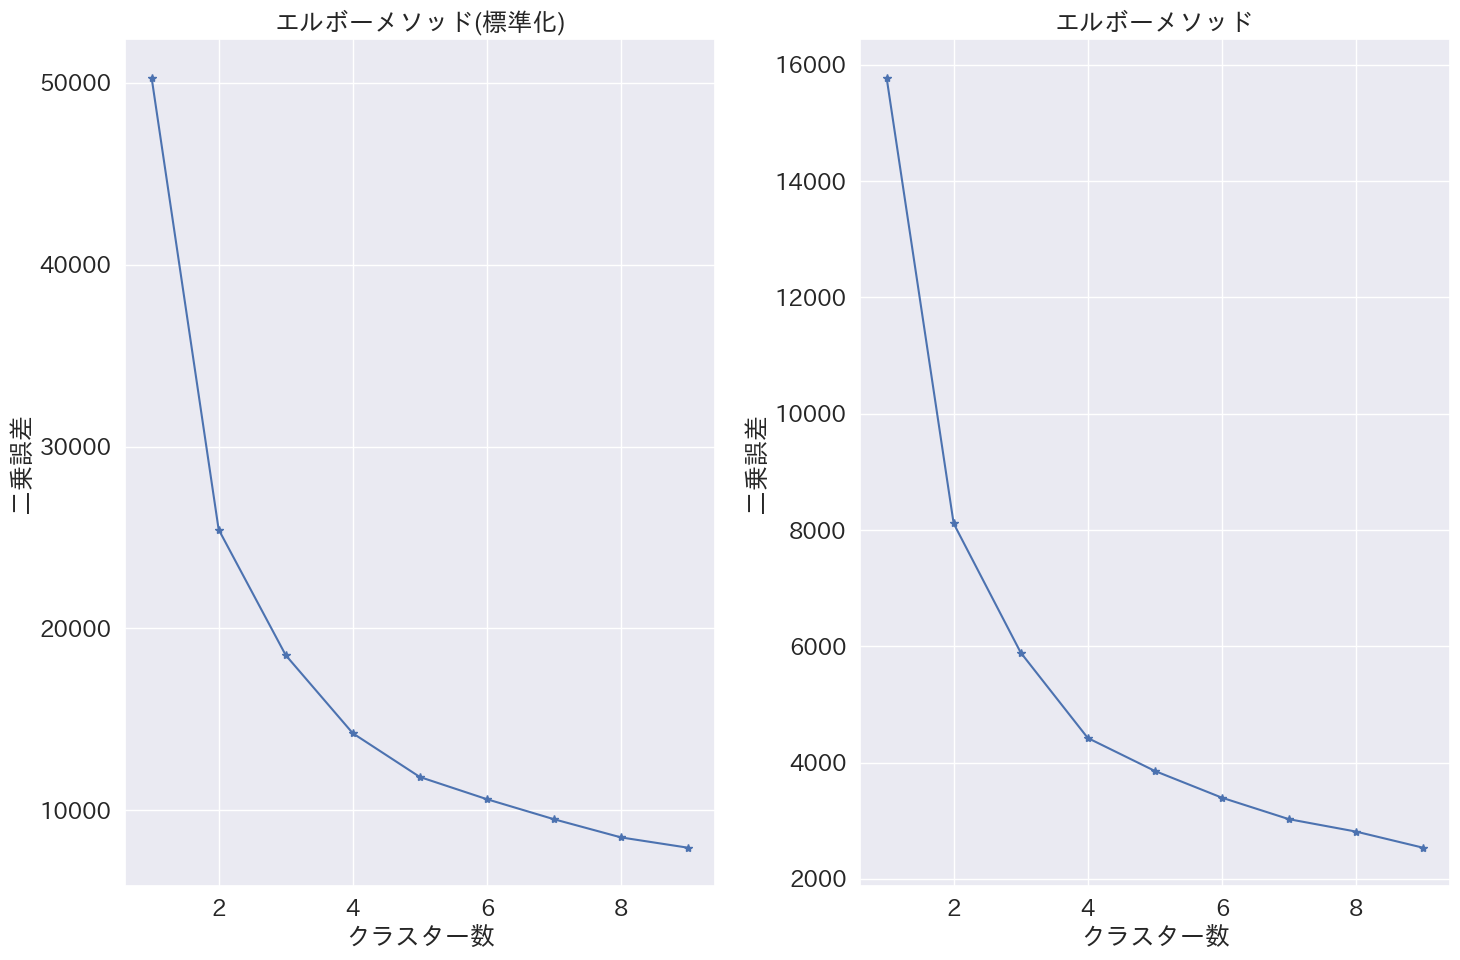

In [32]:
fig = plt.figure(figsize=(15,10), tight_layout=True)

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("エルボーメソッド(標準化)")
ax1.set_xlabel("クラスター数")
ax1.set_ylabel("二乗誤差")
ax1.plot(k_list_std, sse_list_std, marker='*')

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("エルボーメソッド")
ax2.set_xlabel("クラスター数")
ax2.set_ylabel("二乗誤差")
ax2.plot(k_list, sse_list, marker='*')

In [33]:
model = KMeans(n_clusters = 3, random_state=0)
clusters = model.fit(df_score)
array = clusters.labels_
print(array)
pd.Series(array).value_counts()

[0 0 0 ... 1 1 0]


0    10389
1     1941
2      242
dtype: int64

In [34]:
clusters = pd.Series(array, name="クラスタ")
clusters

0        0
1        0
2        0
3        0
4        0
        ..
12567    0
12568    0
12569    1
12570    1
12571    0
Name: クラスタ, Length: 12572, dtype: int32

In [35]:
df_update2 = pd.concat([df_update, clusters], axis=1)
df_update2

,サロン名,名前,総合,雰囲気,接客サービス,技術、仕上がり,メニュー、料金,口コミ本文,性別,年齢,属性,クラスタ
0,replay【リプレイ】,みんさん,5,5,5,5,5,店内がお洒落でした。接客も丁寧で、カラーの色合いなど提案してくれました。理想のカラーになって...,女性,40代,会社員,0
1,replay【リプレイ】,naoさん,5,5,5,5,5,久しぶりでしたが、シャンプーからカットまで全て心地よかったです。\n気に入っていなかった髪型...,女性,40代,None,0
2,replay【リプレイ】,mitoさん,5,5,5,5,5,今回も要望通りに応えてくださってありがとうございました！サラツヤになりました。\n職場でも「...,女性,50代,その他,0
3,replay【リプレイ】,ni-noさん,5,5,5,5,4,カラーとカットをして頂きました。カラーは白髪ぼかしという感じでハイライトを入れて頂いています...,女性,40代,None,0
4,replay【リプレイ】,さっちゃんさん,5,5,5,5,5,今回もありがとうございました！！\nいつも接客が丁寧で気持ちよく過ごせます。\nカラーもカッ...,女性,20代後半,パート・アルバイト,0
...,...,...,...,...,...,...,...,...,...,...,...,...
12567,ROTO,りーさん,5,5,5,5,5,縮毛矯正をして1週間経ちますが、毎日の手入れが楽になって大満足です^^*キレイに縮毛をかけて...,女性,30代前半,None,0
12568,nike【ニケ】,ねいさん,5,5,5,5,5,今までうけたヘッドスパの中で1番すっきりしました！\n肩こりや頭痛、不眠に悩んで、色々なマッ...,女性,30代前半,会社員,0
12569,coquelicot【コクリコ】,和ちゃんさん,4,4,4,4,4,沢山気をつかわせてしまってごめんなさい\nスッキリしました。主人に誉められました。ありがとう...,女性,50代,None,1
12570,coquelicot【コクリコ】,和ちゃんさん,4,4,4,3,3,いつも無理なお願いを聞いて頂いてありがとうございます。居心地のいい雰囲気が気にいってます。\...,女性,50代,その他,1


In [36]:
temp = df_update2[["総合","雰囲気","接客サービス","技術、仕上がり","メニュー、料金","クラスタ"]]
temp

,総合,雰囲気,接客サービス,技術、仕上がり,メニュー、料金,クラスタ
0,5,5,5,5,5,0
1,5,5,5,5,5,0
2,5,5,5,5,5,0
3,5,5,5,5,4,0
4,5,5,5,5,5,0
...,...,...,...,...,...,...
12567,5,5,5,5,5,0
12568,5,5,5,5,5,0
12569,4,4,4,4,4,1
12570,4,4,4,3,3,1


In [37]:
temp[temp.loc[:,"クラスタ"] == 0].describe()

,総合,雰囲気,接客サービス,技術、仕上がり,メニュー、料金,クラスタ
count,10389.000000,10389.000000,10389.000000,10389.000000,10389.000000,10389.0
mean,4.991048,4.932717,4.976899,4.968717,4.855809,0.0
std,0.094194,0.255092,0.150872,0.176288,0.373352,0.0
min,4.000000,3.000000,3.000000,3.000000,3.000000,0.0
25%,5.000000,5.000000,5.000000,5.000000,5.000000,0.0
50%,5.000000,5.000000,5.000000,5.000000,5.000000,0.0
75%,5.000000,5.000000,5.000000,5.000000,5.000000,0.0
max,5.000000,5.000000,5.000000,5.000000,5.000000,0.0


In [38]:
temp[temp.loc[:,"クラスタ"] == 1].describe()

,総合,雰囲気,接客サービス,技術、仕上がり,メニュー、料金,クラスタ
count,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.0
mean,4.089645,4.076765,4.180835,4.194230,3.902628,1.0
std,0.423779,0.528352,0.543721,0.561559,0.637568,0.0
min,2.000000,2.000000,1.000000,2.000000,2.000000,1.0
25%,4.000000,4.000000,4.000000,4.000000,4.000000,1.0
50%,4.000000,4.000000,4.000000,4.000000,4.000000,1.0
75%,4.000000,4.000000,5.000000,5.000000,4.000000,1.0
max,5.000000,5.000000,5.000000,5.000000,5.000000,1.0


In [39]:
temp[temp.iloc[:, 5] == 1][(temp.iloc[:, 0] == 1) | (temp.iloc[:, 1] == 1) | (temp.iloc[:, 2] == 1) | (temp.iloc[:, 3] == 1) | (temp.iloc[:, 4] == 1)]

,総合,雰囲気,接客サービス,技術、仕上がり,メニュー、料金,クラスタ
7253,5,5,1,5,5,1


In [40]:
temp[temp.loc[:,"クラスタ"] == 2].describe()

,総合,雰囲気,接客サービス,技術、仕上がり,メニュー、料金,クラスタ
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.0
mean,1.880165,3.123967,2.549587,1.863636,2.805785,2.0
std,0.813590,0.994343,1.077697,0.943420,1.030393,0.0
min,1.000000,1.000000,1.000000,1.000000,1.000000,2.0
25%,1.000000,3.000000,2.000000,1.000000,2.000000,2.0
50%,2.000000,3.000000,3.000000,2.000000,3.000000,2.0
75%,3.000000,4.000000,3.000000,3.000000,3.000000,2.0
max,3.000000,5.000000,5.000000,5.000000,5.000000,2.0


In [41]:
temp[temp.loc[:,"クラスタ"] == 2]

,総合,雰囲気,接客サービス,技術、仕上がり,メニュー、料金,クラスタ
8,3,4,4,2,4,2
68,1,4,1,3,3,2
119,2,5,5,1,2,2
131,3,4,4,2,4,2
136,1,1,3,1,2,2
...,...,...,...,...,...,...
12303,3,4,3,3,3,2
12306,2,3,1,3,5,2
12413,3,3,3,3,4,2
12419,3,3,3,3,3,2


cluster0 10389
cluster2 242
cluster1 1941


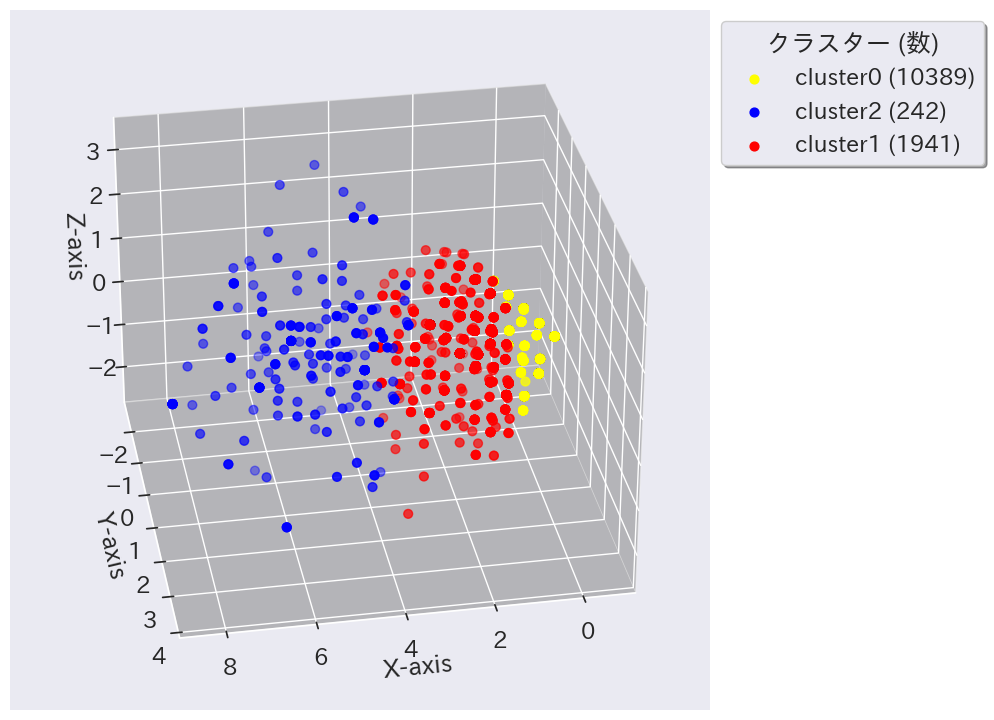

In [42]:
fig = plt.figure(figsize = (20, 20))
x = df_score

pca = PCA(n_components=3, random_state=0)

pca.fit(x)

x_pca = pca.transform(x)

pca_df = pd.DataFrame(x_pca)

pca_df['cluster'] = df_update2["クラスタ"].values

ax = fig.add_subplot(222, projection='3d')

# 視点角度を調整する

ax.view_init(elev=30, azim=80)

color_list = ["yellow","red","blue","green","brown","red","grey","green", "darkblue", "c"]

for i in pca_df['cluster'].unique():
    tmp = pca_df.loc[pca_df['cluster'] == i]
    print(f"cluster{i}", len(tmp))
    sc = ax.scatter(tmp[0], tmp[1], tmp[2], color=color_list[i], s=40, label=f'cluster{i} ({len(tmp)})')
    
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")    

ax.xaxis.pane.set_facecolor("grey")
ax.yaxis.pane.set_facecolor("grey")
ax.zaxis.pane.set_facecolor("grey")

ax.legend(loc="upper left", title='クラスター (数)', shadow=True, bbox_to_anchor=(1, 1)) 

In [43]:
df_update2.口コミ本文 = df_update2.口コミ本文.str.replace("\n", "") 
df_update2.head()

,サロン名,名前,総合,雰囲気,接客サービス,技術、仕上がり,メニュー、料金,口コミ本文,性別,年齢,属性,クラスタ
0,replay【リプレイ】,みんさん,5,5,5,5,5,店内がお洒落でした。接客も丁寧で、カラーの色合いなど提案してくれました。理想のカラーになって...,女性,40代,会社員,0
1,replay【リプレイ】,naoさん,5,5,5,5,5,久しぶりでしたが、シャンプーからカットまで全て心地よかったです。気に入っていなかった髪型を綺...,女性,40代,None,0
2,replay【リプレイ】,mitoさん,5,5,5,5,5,今回も要望通りに応えてくださってありがとうございました！サラツヤになりました。職場でも「いい...,女性,50代,その他,0
3,replay【リプレイ】,ni-noさん,5,5,5,5,4,カラーとカットをして頂きました。カラーは白髪ぼかしという感じでハイライトを入れて頂いています...,女性,40代,None,0
4,replay【リプレイ】,さっちゃんさん,5,5,5,5,5,今回もありがとうございました！！いつも接客が丁寧で気持ちよく過ごせます。カラーもカットもいい...,女性,20代後半,パート・アルバイト,0


In [44]:
#形態素解析を行う。必要なライブラリをインストールimport MeCab
import itertools
import warnings
import re
import unicodedata
import collections
warnings.filterwarnings('ignore')

In [45]:
def num_to_zero(text):
    text = re.sub(r"[0-9]+", "0", text)
    return text

df_update2["口コミ本文形態素"] = df_update2.口コミ本文.apply(num_to_zero)
df_update2.head()

,サロン名,名前,総合,雰囲気,接客サービス,技術、仕上がり,メニュー、料金,口コミ本文,性別,年齢,属性,クラスタ,口コミ本文形態素
0,replay【リプレイ】,みんさん,5,5,5,5,5,店内がお洒落でした。接客も丁寧で、カラーの色合いなど提案してくれました。理想のカラーになって...,女性,40代,会社員,0,店内がお洒落でした。接客も丁寧で、カラーの色合いなど提案してくれました。理想のカラーになって...
1,replay【リプレイ】,naoさん,5,5,5,5,5,久しぶりでしたが、シャンプーからカットまで全て心地よかったです。気に入っていなかった髪型を綺...,女性,40代,None,0,久しぶりでしたが、シャンプーからカットまで全て心地よかったです。気に入っていなかった髪型を綺...
2,replay【リプレイ】,mitoさん,5,5,5,5,5,今回も要望通りに応えてくださってありがとうございました！サラツヤになりました。職場でも「いい...,女性,50代,その他,0,今回も要望通りに応えてくださってありがとうございました！サラツヤになりました。職場でも「いい...
3,replay【リプレイ】,ni-noさん,5,5,5,5,4,カラーとカットをして頂きました。カラーは白髪ぼかしという感じでハイライトを入れて頂いています...,女性,40代,None,0,カラーとカットをして頂きました。カラーは白髪ぼかしという感じでハイライトを入れて頂いています...
4,replay【リプレイ】,さっちゃんさん,5,5,5,5,5,今回もありがとうございました！！いつも接客が丁寧で気持ちよく過ごせます。カラーもカットもいい...,女性,20代後半,パート・アルバイト,0,今回もありがとうございました！！いつも接客が丁寧で気持ちよく過ごせます。カラーもカットもいい...


In [46]:
df_update2["口コミ本文形態素"] = df_update2["口コミ本文形態素"].str.lower().map(lambda x : unicodedata.normalize("NFKC", x))
df_update2.head()

,サロン名,名前,総合,雰囲気,接客サービス,技術、仕上がり,メニュー、料金,口コミ本文,性別,年齢,属性,クラスタ,口コミ本文形態素
0,replay【リプレイ】,みんさん,5,5,5,5,5,店内がお洒落でした。接客も丁寧で、カラーの色合いなど提案してくれました。理想のカラーになって...,女性,40代,会社員,0,店内がお洒落でした。接客も丁寧で、カラーの色合いなど提案してくれました。理想のカラーになって...
1,replay【リプレイ】,naoさん,5,5,5,5,5,久しぶりでしたが、シャンプーからカットまで全て心地よかったです。気に入っていなかった髪型を綺...,女性,40代,None,0,久しぶりでしたが、シャンプーからカットまで全て心地よかったです。気に入っていなかった髪型を綺...
2,replay【リプレイ】,mitoさん,5,5,5,5,5,今回も要望通りに応えてくださってありがとうございました！サラツヤになりました。職場でも「いい...,女性,50代,その他,0,今回も要望通りに応えてくださってありがとうございました!サラツヤになりました。職場でも「いい...
3,replay【リプレイ】,ni-noさん,5,5,5,5,4,カラーとカットをして頂きました。カラーは白髪ぼかしという感じでハイライトを入れて頂いています...,女性,40代,None,0,カラーとカットをして頂きました。カラーは白髪ぼかしという感じでハイライトを入れて頂いています...
4,replay【リプレイ】,さっちゃんさん,5,5,5,5,5,今回もありがとうございました！！いつも接客が丁寧で気持ちよく過ごせます。カラーもカットもいい...,女性,20代後半,パート・アルバイト,0,今回もありがとうございました!!いつも接客が丁寧で気持ちよく過ごせます。カラーもカットもいい...


In [47]:
import subprocess
cmd = 'echo `mecab-config --dicdir`"/mecab-ipadic-neologd"'
dict_path = (subprocess.Popen(cmd, stdout=subprocess.PIPE, shell=True)).communicate()[0].decode('utf-8')
print(dict_path)

/usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd



In [48]:
mecab = MeCab.Tagger(f"-r /dev/null -d {dict_path} -Ochasen")
mecab.parse("")

'EOS\n'

In [49]:
def exclude_hinshi(text):
    result = []
    node = mecab.parseToNode(text)

    while node:
        if node.feature.split(",")[0] not in ["助詞", "記号", "助動詞", "接続詞", "連帯詞", "動詞", "接続詞"] and node.feature.split(",")[6] != "*":
            result.append(node.feature.split(",")[6])
        node = node.next

    return " ".join(result)

df_update2["口コミ本文形態素"] = df_update2["口コミ本文形態素"].apply(exclude_hinshi)
df_update2

,サロン名,名前,総合,雰囲気,接客サービス,技術、仕上がり,メニュー、料金,口コミ本文,性別,年齢,属性,クラスタ,口コミ本文形態素
0,replay【リプレイ】,みんさん,5,5,5,5,5,店内がお洒落でした。接客も丁寧で、カラーの色合いなど提案してくれました。理想のカラーになって...,女性,40代,会社員,0,店内 お洒落 接客 丁寧 カラー 色合い 提案 理想 カラー とても よろしくお願いします
1,replay【リプレイ】,naoさん,5,5,5,5,5,久しぶりでしたが、シャンプーからカットまで全て心地よかったです。気に入っていなかった髪型を綺...,女性,40代,None,0,久しぶり シャンプー カット 全て 心地よい 髪型 綺麗 ありがとう
2,replay【リプレイ】,mitoさん,5,5,5,5,5,今回も要望通りに応えてくださってありがとうございました！サラツヤになりました。職場でも「いい...,女性,50代,その他,0,今回 要望 通り ありがとう サラ ツヤ 職場 いいねぇ~ よろしくお願いします
3,replay【リプレイ】,ni-noさん,5,5,5,5,4,カラーとカットをして頂きました。カラーは白髪ぼかしという感じでハイライトを入れて頂いています...,女性,40代,None,0,カラー カット カラー 白髪 ぼかし 感じ ハイライト いつも 人 の オシャレ カラー 私...
4,replay【リプレイ】,さっちゃんさん,5,5,5,5,5,今回もありがとうございました！！いつも接客が丁寧で気持ちよく過ごせます。カラーもカットもいい...,女性,20代後半,パート・アルバイト,0,今回 ありがとう いつも 接客 丁寧 気持ちよい カラー カット いい 感じ 嬉しい 髪 笑 月
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12567,ROTO,りーさん,5,5,5,5,5,縮毛矯正をして1週間経ちますが、毎日の手入れが楽になって大満足です^^*キレイに縮毛をかけて...,女性,30代前半,None,0,縮毛矯正 週間 毎日 手入れ 楽 大 満足 キレイ 縮毛 ありがとう 話 やすい お 店 雰...
12568,nike【ニケ】,ねいさん,5,5,5,5,5,今までうけたヘッドスパの中で1番すっきりしました！肩こりや頭痛、不眠に悩んで、色々なマッサー...,女性,30代前半,会社員,0,今 ヘッドスパ 中 番 すっきり 肩こり 頭痛 不眠 色々 マッサージ ヘッドスパ その 時...
12569,coquelicot【コクリコ】,和ちゃんさん,4,4,4,4,4,沢山気をつかわせてしまってごめんなさいスッキリしました。主人に誉められました。ありがとうござ...,女性,50代,None,1,沢 山気 ごめんなさい スッキリ 主人 ありがとう
12570,coquelicot【コクリコ】,和ちゃんさん,4,4,4,3,3,いつも無理なお願いを聞いて頂いてありがとうございます。居心地のいい雰囲気が気にいってます。ま...,女性,50代,その他,1,いつも 無理 お願い ありがとう 居心地 いい 雰囲気 おじゃま


In [50]:
def remove_words(text):
    result = []
    node = mecab.parseToNode(text)

    while node:
        if node.surface not in ["とても", "髪", "お", "方", "さん", "こと", "大", "店", "髪型","施術", "色", "よい", "いい", "毛", "ない",
                                "よう","カット", "カラー", "仕上がり", "髪の毛", "良い", "ありがとう","その", "この", "トリートメント", "シャンプー",
                                "時間", "お願い", "初めて", "担当", "今回", "対応", "気", "私", "感じ", "雰囲気", "の", "丁寧", "ん", "接客",
                               "自分", "少し","も","利用"]:
            result.append(node.surface) 
        node = node.next
    
    return " ".join(result)

df_update2["口コミ本文形態素"] = df_update2["口コミ本文形態素"].str.lower().apply(remove_words)

In [51]:
#全ての口コミ本文形態素の頻出ワード
freq_word_series = pd.Series("".join(df_update2["口コミ本文形態素"]).split(" "))
freq_word_df_valuecounts = freq_word_series.value_counts().to_frame("count")
freq_word_df_valuecounts[1:].head(15)

,count
満足,4151
いつも,3401
よろしくお願いします,2050
やすい,1647
次回,1550
綺麗,1434
嬉しい,1303
通り,1150
楽しい,1120
可愛い,988


In [52]:
#クラスタ0の口コミ本文形態素の頻出ワード
freq_word_series_cluster0 = pd.Series("".join(df_update2["口コミ本文形態素"][df_update2["クラスタ"] == 0]).split(" "))
freq_word_df_valuecounts_cluster0 = freq_word_series_cluster0.value_counts().to_frame("count")
freq_word_df_valuecounts_cluster0[1:].head(15)

,count
満足,3631
いつも,3028
よろしくお願いします,1849
やすい,1380
次回,1355
綺麗,1243
嬉しい,1164
楽しい,1016
通り,992
可愛い,914


In [53]:
#クラスタ1の口コミ本文形態素の頻出ワード
freq_word_series_cluster1 = pd.Series("".join(df_update2["口コミ本文形態素"][df_update2["クラスタ"] == 1]).split(" "))
freq_word_df_valuecounts_cluster1 = freq_word_series_cluster1.value_counts().to_frame("count")
freq_word_df_valuecounts_cluster1[1:].head(15)

,count
満足,499
いつも,356
やすい,255
よろしくお願いします,199
次回,190
綺麗,172
通り,146
前髪,140
しっかり,135
嬉しい,134


In [54]:
#クラスタ2の口コミ本文形態素の頻出ワード
freq_word_series_cluster2 = pd.Series("".join(df_update2["口コミ本文形態素"][df_update2["クラスタ"] == 2]).split(" "))
freq_word_df_valuecounts_cluster2 = freq_word_series_cluster2.value_counts().to_frame("count")
freq_word_df_valuecounts_cluster2[1:].head(15)

,count
残念,91
前髪,63
時,53
他,44
予約,43
後,37
短い,33
セット,32
何,32
0分,32


In [55]:
df_update2.口コミ本文[df_update2.クラスタ == 2][(df_update2.口コミ本文形態素.str.contains("予約"))&\
                                       (df_update2.口コミ本文形態素.str.contains("時"))].to_frame().to_csv("/root/data/cluster2_reservation_hour.csv")

In [56]:
df_update2.口コミ本文[df_update2.クラスタ == 2][df_update2.口コミ本文形態素.str.contains("前髪")].to_frame().to_csv("/root/data/cluster2_reservation_flonthair.csv")

In [57]:
df_update2.口コミ本文[df_update2.クラスタ == 2][df_update2.口コミ本文形態素.str.contains("確認")].to_frame().to_csv("/root/data/cluster2_reservation_confirm.csv")

In [58]:
df_update2.口コミ本文[df_update2.クラスタ == 2][df_update2.口コミ本文形態素.str.contains("パーマ")].to_frame().to_csv("/root/data/cluster2_reservation_perm.csv")

In [59]:
df_groupby = df_update2.groupby(["サロン名","名前"])
df_groupby.filter(lambda x : x.名前.count() >= 2).sort_values(by=["サロン名", "名前"])

,サロン名,名前,総合,雰囲気,接客サービス,技術、仕上がり,メニュー、料金,口コミ本文,性別,年齢,属性,クラスタ,口コミ本文形態素
11296,-ヘアメイク・ヘッドスパ専門店-cocon【ココン】,kkさん,5,5,5,5,5,いつもありがとうございます今年もよろしくお願いします。毎回癒されています,女性,40代,None,0,いつも 今年 よろしくお願いします 毎回
11298,-ヘアメイク・ヘッドスパ専門店-cocon【ココン】,kkさん,5,5,5,5,5,いつもありがとうございます今年もよろしくおねがいします,女性,40代,None,0,いつも 今年 よろしく おねがい
11301,-ヘアメイク・ヘッドスパ専門店-cocon【ココン】,kkさん,5,5,5,5,5,いつもお世話になってます。とても癒されています^ ^これからもよろしくお願いします。,女性,40代,None,0,いつも お世話 これから よろしくお願いします
11302,-ヘアメイク・ヘッドスパ専門店-cocon【ココン】,kkさん,5,5,5,5,5,いつもありがとうございますまたお願いします,女性,40代,None,0,いつも
11304,-ヘアメイク・ヘッドスパ専門店-cocon【ココン】,kkさん,5,5,5,5,5,いつもありがとうございます。またおねがいします,女性,40代,会社員,0,いつも おねがい
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11668,髪結床 月白,エイミーさん,5,5,5,5,5,今回は、ショートヘアーにしたくて、イメージを伝えてカットして頂きました。満足な仕上がりです。...,女性,50代,会社員,0,イメージ 満足 マッサージ 肩 軽い スッキリ 年 そう 早い 来年 よろしくお願いします
11677,髪結床 月白,エイミーさん,5,5,5,5,5,今回2回目。会社帰り19:30にカットを予約しました。前回の髪型が好評だった事だけ伝えてお任...,女性,50代,会社員,0,0回目 会社 帰り 予約 前回 好評 事 前回 良さ 新しい 部分 遅い かけて マッサー...
11682,髪結床 月白,エイミーさん,5,5,5,5,5,完全予約で一人のみなので、特別な気分になりました。お店も和風で落ち着きます。スタイリストの方...,女性,50代,会社員,0,完全 予約 一人 特別 気分 和風 スタイリスト 満足 時 マッサージ 肩 マッサージ リ...
2264,髪質改善ヘアエステRECALO【リカロ】Hiroshima,kさん,5,5,5,5,4,髪色も綺麗にしてくださり、何よりも髪の毛の指通りが良くなって嬉しいです！一回で見違えるほどサ...,女性,10代後半,学生,0,綺麗 手管 何 指 通り 嬉しい 一 回 サラサラ 次回 楽しみ


In [60]:
df2_or_more = df_groupby.filter(lambda x : x.名前.count() >= 2)
df2_or_more.reset_index(drop=True, inplace=True)

In [61]:
df2_or_more.sort_values(by=["サロン名", "名前"])

,サロン名,名前,総合,雰囲気,接客サービス,技術、仕上がり,メニュー、料金,口コミ本文,性別,年齢,属性,クラスタ,口コミ本文形態素
7042,-ヘアメイク・ヘッドスパ専門店-cocon【ココン】,kkさん,5,5,5,5,5,いつもありがとうございます今年もよろしくお願いします。毎回癒されています,女性,40代,None,0,いつも 今年 よろしくお願いします 毎回
7044,-ヘアメイク・ヘッドスパ専門店-cocon【ココン】,kkさん,5,5,5,5,5,いつもありがとうございます今年もよろしくおねがいします,女性,40代,None,0,いつも 今年 よろしく おねがい
7047,-ヘアメイク・ヘッドスパ専門店-cocon【ココン】,kkさん,5,5,5,5,5,いつもお世話になってます。とても癒されています^ ^これからもよろしくお願いします。,女性,40代,None,0,いつも お世話 これから よろしくお願いします
7048,-ヘアメイク・ヘッドスパ専門店-cocon【ココン】,kkさん,5,5,5,5,5,いつもありがとうございますまたお願いします,女性,40代,None,0,いつも
7050,-ヘアメイク・ヘッドスパ専門店-cocon【ココン】,kkさん,5,5,5,5,5,いつもありがとうございます。またおねがいします,女性,40代,会社員,0,いつも おねがい
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7225,髪結床 月白,エイミーさん,5,5,5,5,5,今回は、ショートヘアーにしたくて、イメージを伝えてカットして頂きました。満足な仕上がりです。...,女性,50代,会社員,0,イメージ 満足 マッサージ 肩 軽い スッキリ 年 そう 早い 来年 よろしくお願いします
7230,髪結床 月白,エイミーさん,5,5,5,5,5,今回2回目。会社帰り19:30にカットを予約しました。前回の髪型が好評だった事だけ伝えてお任...,女性,50代,会社員,0,0回目 会社 帰り 予約 前回 好評 事 前回 良さ 新しい 部分 遅い かけて マッサー...
7233,髪結床 月白,エイミーさん,5,5,5,5,5,完全予約で一人のみなので、特別な気分になりました。お店も和風で落ち着きます。スタイリストの方...,女性,50代,会社員,0,完全 予約 一人 特別 気分 和風 スタイリスト 満足 時 マッサージ 肩 マッサージ リ...
1437,髪質改善ヘアエステRECALO【リカロ】Hiroshima,kさん,5,5,5,5,4,髪色も綺麗にしてくださり、何よりも髪の毛の指通りが良くなって嬉しいです！一回で見違えるほどサ...,女性,10代後半,学生,0,綺麗 手管 何 指 通り 嬉しい 一 回 サラサラ 次回 楽しみ


In [62]:
df_score2 = df2_or_more.iloc[:, 2:7]
df_score2

,総合,雰囲気,接客サービス,技術、仕上がり,メニュー、料金
0,5,5,5,5,5
1,5,5,5,5,4
2,5,5,5,5,5
3,5,5,5,5,4
4,5,5,5,5,5
...,...,...,...,...,...
7798,3,3,3,3,4
7799,5,5,5,5,5
7800,5,5,5,5,5
7801,4,4,4,4,4


     総合
5  6749
4   963
3    60
2    16
1    15
    雰囲気
5  6455
4  1225
3   116
1     4
2     3
   接客サービス
5    6779
4     915
3      88
1      14
2       7
   技術、仕上がり
5     6771
4      921
3       74
2       22
1       15
   メニュー、料金
5     5913
4     1509
3      357
2       18
1        6


Text(0.5, 1.0, '料金・メニュー')

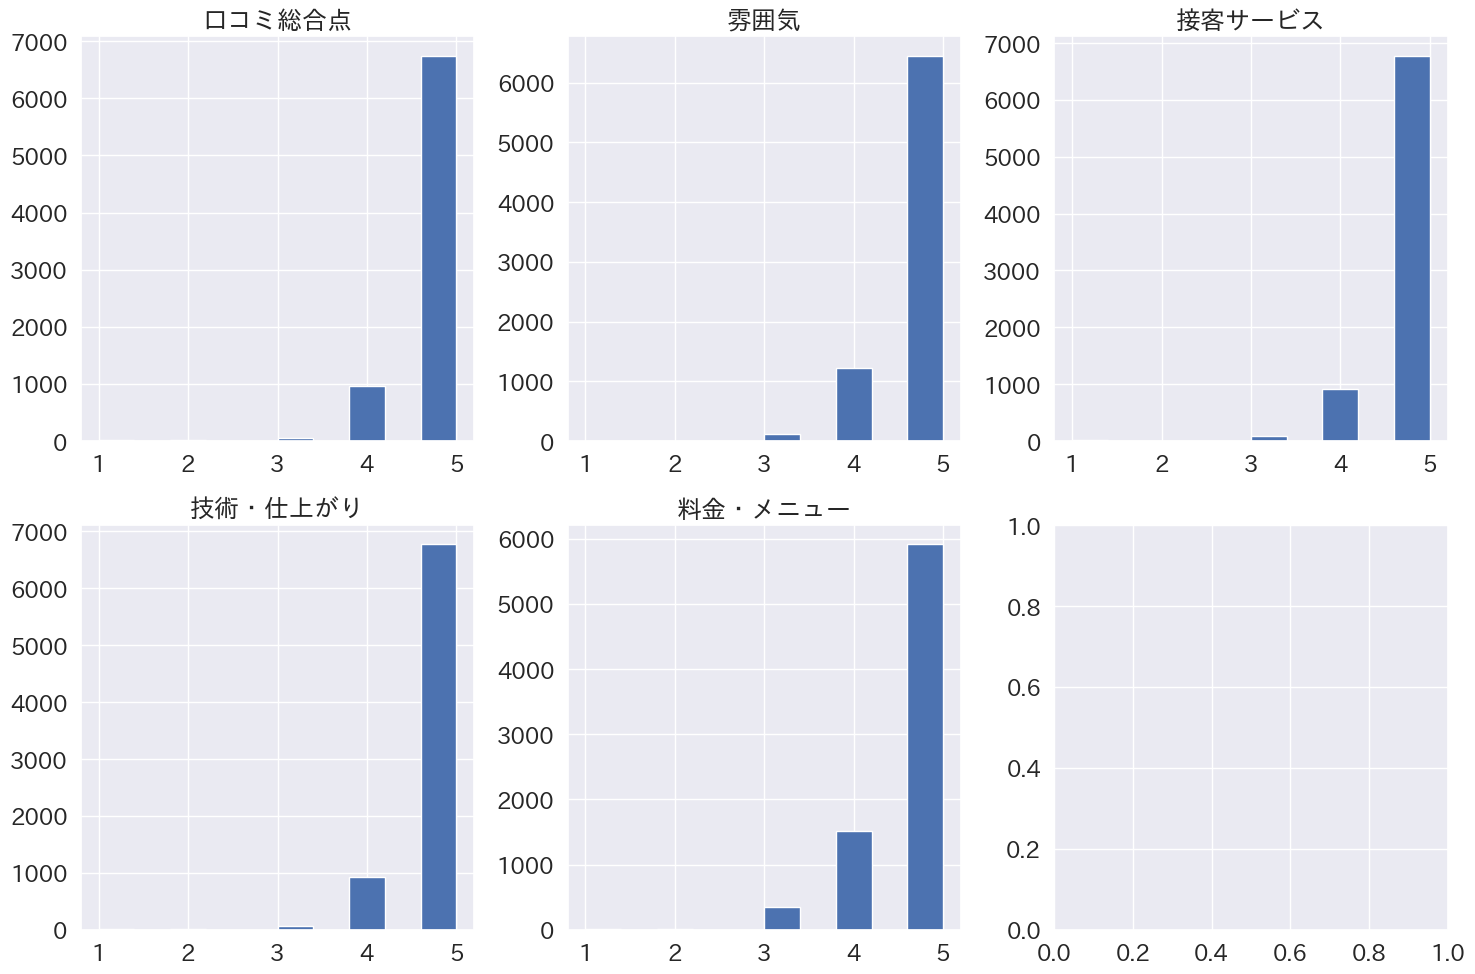

In [63]:
plt.rcParams["font.size"] = 15
print(pd.DataFrame(df_score2.総合.value_counts()))
print(pd.DataFrame(df_score2.雰囲気.value_counts()))
print(pd.DataFrame(df_score2.接客サービス.value_counts()))
print(pd.DataFrame(df_score2.iloc[:,3].value_counts()))
print(pd.DataFrame(df_score2.iloc[:,4].value_counts()))

fig, ax = plt.subplots(2,3, figsize=(15,10), tight_layout=True)

ax[0,0].hist(df_score2.総合)
ax[0,0].set_title("口コミ総合点")

ax[0,1].hist(df_score2.雰囲気)
ax[0,1].set_title("雰囲気")

ax[0,2].hist(df_score2.接客サービス)
ax[0,2].set_title("接客サービス")

ax[1,0].hist(df_score2.iloc[:, 3])
ax[1,0].set_title("技術・仕上がり")

ax[1,1].hist(df_score2.iloc[:, 4])
ax[1,1].set_title("料金・メニュー")


In [64]:
df2_or_more[(df2_or_more.総合 ==1) | (df2_or_more.総合 ==2)].sort_values(["サロン名", "名前"])

,サロン名,名前,総合,雰囲気,接客サービス,技術、仕上がり,メニュー、料金,口コミ本文,性別,年齢,属性,クラスタ,口コミ本文形態素
1620,ATENA AVEDA 広島パルコ店 【アテナアヴェダ】,ceciliaさん,2,2,2,5,5,いつも丁寧に仕上げてくださり、とても満足しています。とてもお気に入りの美容院なのですが、マス...,女性,40代,その他,1,いつも くだ 満足 お気に入り 美容院 マスク 客 あ 席 移動 以前 同じ 光景 上 マ...
1725,ATENA AVEDA 広島パルコ店 【アテナアヴェダ】,あっきさん,2,3,1,2,5,カットは気に入りました。とても綺麗です。でもカラーは青みよりのラベンダーグレージュってお願い...,女性,30代後半,会社員,2,綺麗 青み 赤 紫 インナー メッシュ つもり 下 半分 ベタ塗り うまい それ 全体 サ...
1492,ATENA AVEDA 広島パルコ店 【アテナアヴェダ】,あみさん,1,3,2,1,1,前髪パーマで予約しました。イメージ写真を軽く見せた後、長さを整えるか等のカウンセリングはなく...,女性,20代前半,会社員,2,前髪 パーマ 予約 イメージ 写真 軽い 後 長さ 下等 カウンセリング bleach 履...
1568,ATENA AVEDA 広島パルコ店 【アテナアヴェダ】,あやのさん,2,3,2,2,2,立地、内装、設備は良い,女性,20代後半,None,2,立地 内装 設備
1796,ATENA AVEDA 広島パルコ店 【アテナアヴェダ】,かなさん,1,1,1,4,2,2回目の来店でしたが、シャンプーがとても気持ちよく、前回のカットも良かったのですが、フロント...,女性,30代後半,会社員,2,0回目 来店 気持ちよい 前回 フロント 態度 悪い 不愉快 前回 時 たまたま 機嫌 悪...
1663,ATENA AVEDA 広島パルコ店 【アテナアヴェダ】,ゆさん,1,3,3,1,1,先日は丁寧に施術をして頂きありがとうございました。最後に巻いて仕上げて頂いたので次の日になる...,女性,20代前半,会社員,2,先日 最後 次 日 時々 長い 付き 左右 差 始め 色味 だいぶ 暗い なんだか 残念
5175,CLEO hair Cenote【クレオヘアセノーテ】,すばちゃんさん,1,3,1,1,3,行くたびにいい感じのカットをして下さるので3回目の来店でした。前回担当のスタイリストさんがお...,女性,50代,主婦,2,たび 0回目 来店 前回 スタイリスト 休み まあ 他 人 大丈夫 間違い 気配り 無い ...
2960,E Komo hair 【エコモ ヘアー】,ぽんこさん,1,1,1,1,1,前回、とても素敵に対応して頂いたので、また今回もと思って指名無で来店したのが間違いでした。そ...,女性,40代,会社員,2,前回 素敵 指名 無 来店 間違い 場 スタッフ 助け 位 下手 切り 痛み 他 さらに ...
1095,La fith hair SEnSE 広島袋町店【ラフィス ヘアー センス】,mさん,2,3,2,1,3,予約時間にきっちり行ったけど30分待たされその後の接客もどこか上からな感じがしました、、、そ...,女性,20代前半,会社員,2,予約 きっちり 0分 その後 どこか 上 場 アイロン 時 明らか 一部 長い ところ
1052,La fith hair SEnSE 広島袋町店【ラフィス ヘアー センス】,☆さん,2,3,1,2,2,最初にやりたい要望だけ聞かれ、過去のカラーの履歴や悩み、髪質の事は全く聞かれず大丈夫かなと思...,女性,20代後半,None,2,最初 要望 過去 履歴 悩み 質 事 全く 大丈夫 最初 bleach 案の定 bleac...


Text(0.5, 1.0, '各スコア5の数')

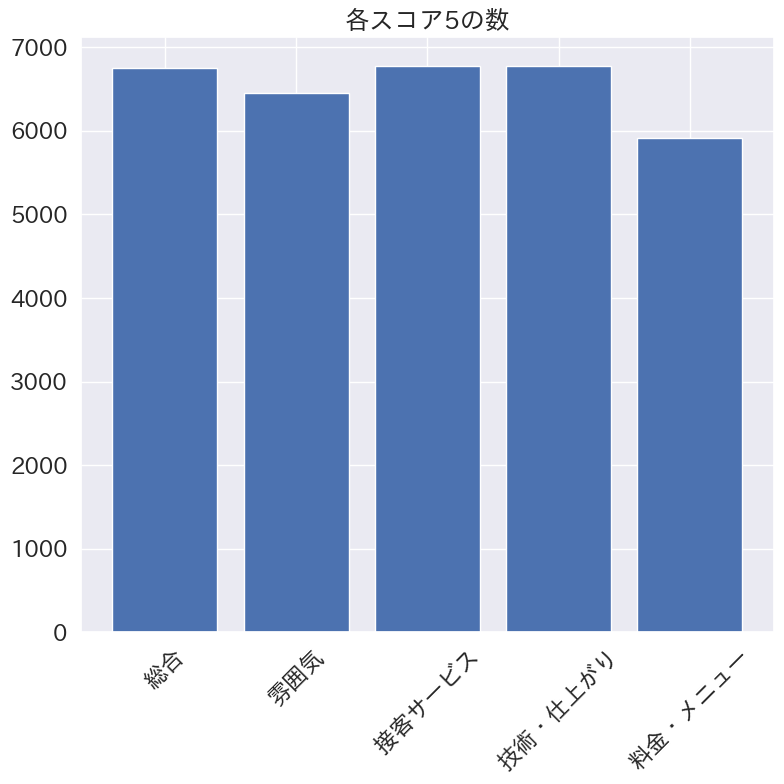

In [65]:
sougou5 = df_score2.総合[df_score2.総合==5].size
huniki5 = df_score2.雰囲気[df_score2.雰囲気==5].size
sekkyaku5 = df_score2.接客サービス[df_score2.接客サービス==5].size
gijyutsu5 = df_score2.iloc[:, 3][df_score2.iloc[:, 3]==5].size
ryoukin5 = df_score2.iloc[:, 4][df_score2.iloc[:, 4]==5].size

x = ["総合", "雰囲気", "接客サービス", "技術・仕上がり", "料金・メニュー"]
height = [sougou5, huniki5, sekkyaku5, gijyutsu5, ryoukin5]

plt.rcParams["font.size"]=12
figure = plt.figure(figsize=(8, 8), tight_layout=True)
plt.bar(x=x, height=height)
# plt.ylim(40000)
plt.xticks(rotation=45)
plt.title("各スコア5の数")

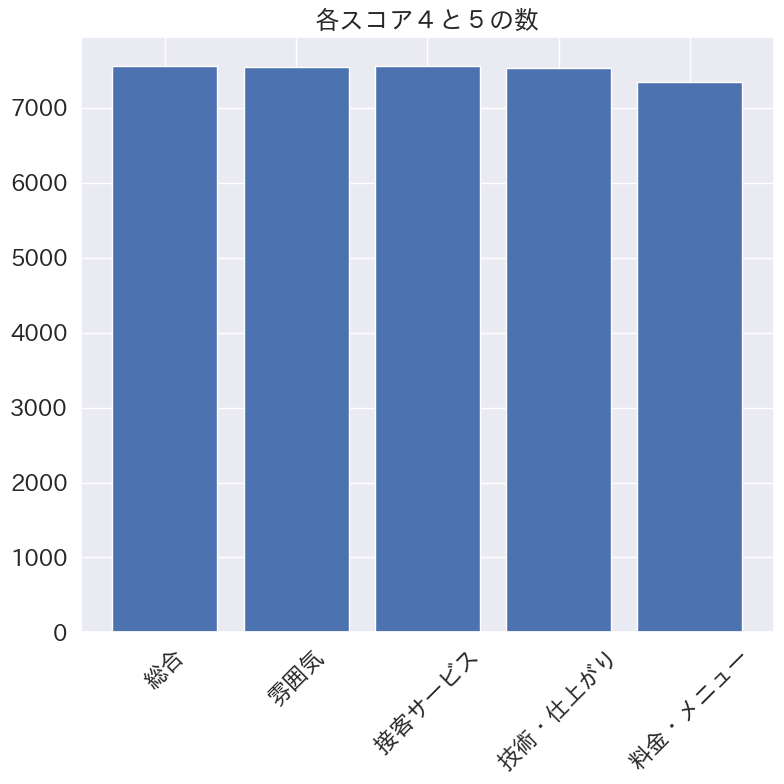

In [66]:
sougou4_5 = df_score2.総合[(df_score.総合==4) | (df_score.総合==5)].size
huniki4_5 = df_score2.雰囲気[(df_score.雰囲気==4) | (df_score.雰囲気==5)].size
sekkyaku4_5 = df_score2.接客サービス[(df_score.接客サービス==4) | (df_score.接客サービス==5)].size
gijyutsu4_5 = df_score2.iloc[:, 3][(df_score.iloc[:, 3]==4)| (df_score.iloc[:, 3]==5)].size
ryoukin4_5 = df_score2.iloc[:, 4][(df_score.iloc[:, 4]==4) | (df_score.iloc[:, 4]==5)].size

x = ["総合", "雰囲気", "接客サービス", "技術・仕上がり", "料金・メニュー"]
height = [sougou4_5, huniki4_5, sekkyaku4_5, gijyutsu4_5, ryoukin4_5]

plt.rcParams["font.size"]=12
figure = plt.figure(figsize=(8, 8), tight_layout=True)
plt.bar(x=x, height=height)
# plt.ylim(50000)
plt.title("各スコア４と５の数")
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, '各スコア1の数')

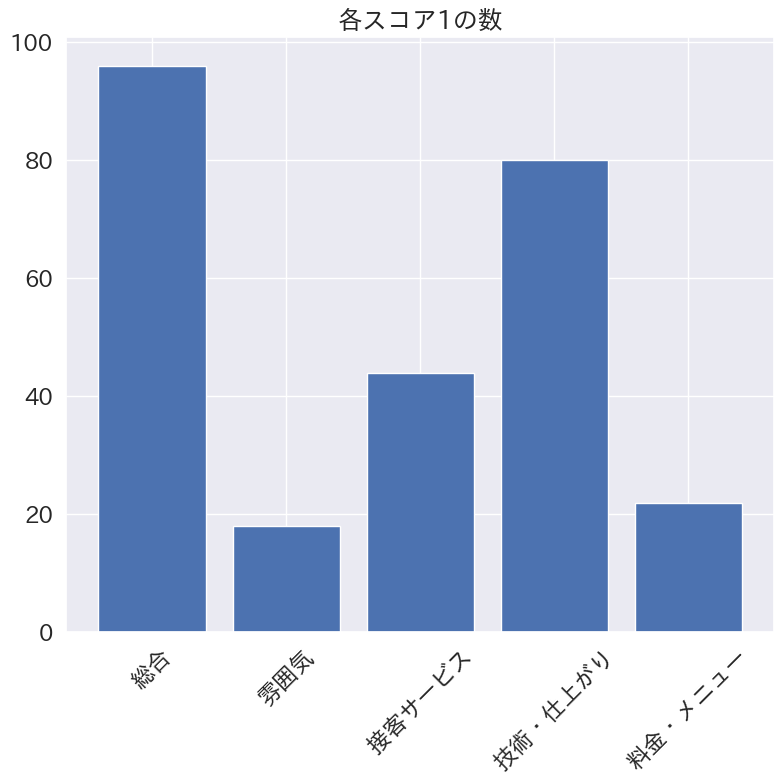

In [67]:
#### sougou1 = df_score.総合[df_score.総合==1].size
huniki1 = df_score2.雰囲気[df_score.雰囲気==1].size
sekkyaku1 = df_score2.接客サービス[df_score.接客サービス==1].size
gijyutsu1 = df_score2.iloc[:, 3][df_score.iloc[:, 3]==1].size
ryoukin1 = df_score2.iloc[:, 4][df_score.iloc[:, 4]==1].size

x = ["総合", "雰囲気", "接客サービス", "技術・仕上がり", "料金・メニュー"]
height = [sougou1, huniki1, sekkyaku1, gijyutsu1, ryoukin1]

plt.rcParams["font.size"]=12
figure = plt.figure(figsize=(8, 8), tight_layout=True)
plt.bar(x=x, height=height)
# plt.ylim(100)
plt.xticks(rotation=45)
plt.title("各スコア1の数")

Text(0.5, 1.0, '各スコア1と2の数')

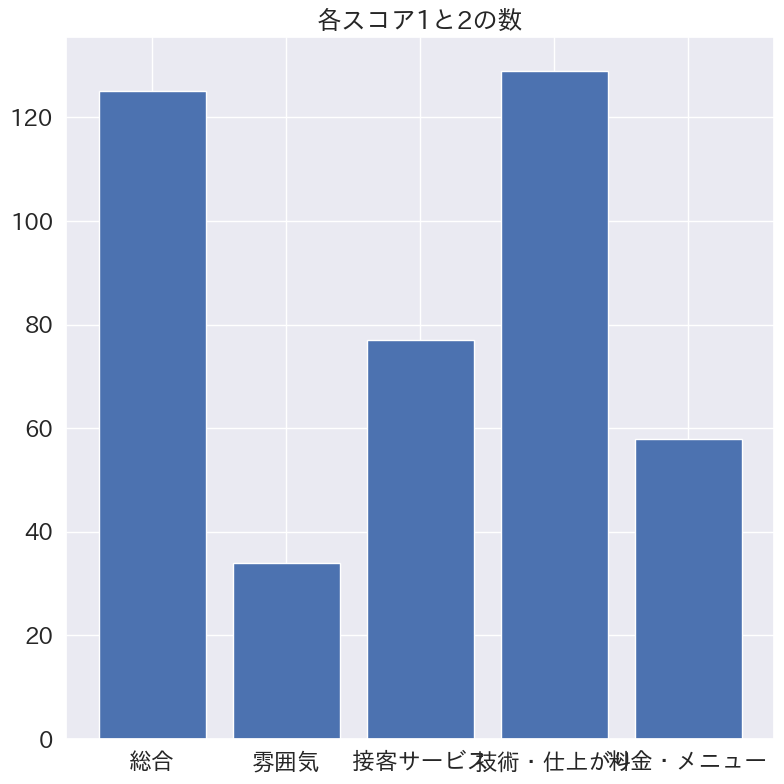

In [68]:
sougou1_2 = df_score2.総合[(df_score.総合==1)|(df_score.総合==2)].size
huniki1_2 = df_score2.雰囲気[(df_score.雰囲気==1)|(df_score.雰囲気==2)].size
sekkyaku1_2 = df_score2.接客サービス[(df_score.接客サービス==1)|(df_score.接客サービス==2)].size
gijyutsu1_2 = df_score2.iloc[:, 3][(df_score.iloc[:, 3]==1)|(df_score.iloc[:, 3]==2)].size
ryoukin1_2 = df_score2.iloc[:, 4][(df_score.iloc[:, 4]==1)|(df_score.iloc[:, 4]==2)].size

x = ["総合", "雰囲気", "接客サービス", "技術・仕上がり", "料金・メニュー"]
height = [sougou1_2, huniki1_2, sekkyaku1_2, gijyutsu1_2, ryoukin1_2]

plt.rcParams["font.size"]=12
figure = plt.figure(figsize=(8, 8), tight_layout=True)
plt.bar(x=x, height=height)
# plt.ylim(800)
plt.title("各スコア1と2の数")

In [69]:
ss = StandardScaler()

df_score2_std = pd.DataFrame(ss.fit_transform(df_score2), columns=df_score2.columns)
df_score2_std.head()

,総合,雰囲気,接客サービス,技術、仕上がり,メニュー、料金
0,0.359675,0.433396,0.356044,0.352602,0.519266
1,0.359675,0.433396,0.356044,0.352602,-1.241636
2,0.359675,0.433396,0.356044,0.352602,0.519266
3,0.359675,0.433396,0.356044,0.352602,-1.241636
4,0.359675,0.433396,0.356044,0.352602,0.519266


In [70]:
#標準化ありのXのエルボー法
k_list_std = range(1, 10)
sse_list_std = []
for k in k_list_std:
    model = KMeans(n_clusters=k, random_state=0)
    model = model.fit(df_score2_std)
    sse_list_std.append(model.inertia_) #inertia_各クラスタ内の二乗誤差

k_list = range(1,10)
sse_list = []
for k in k_list:
    model = KMeans(n_clusters=k, random_state=0)
    model = model.fit(df_score2)
    sse_list.append(model.inertia_)

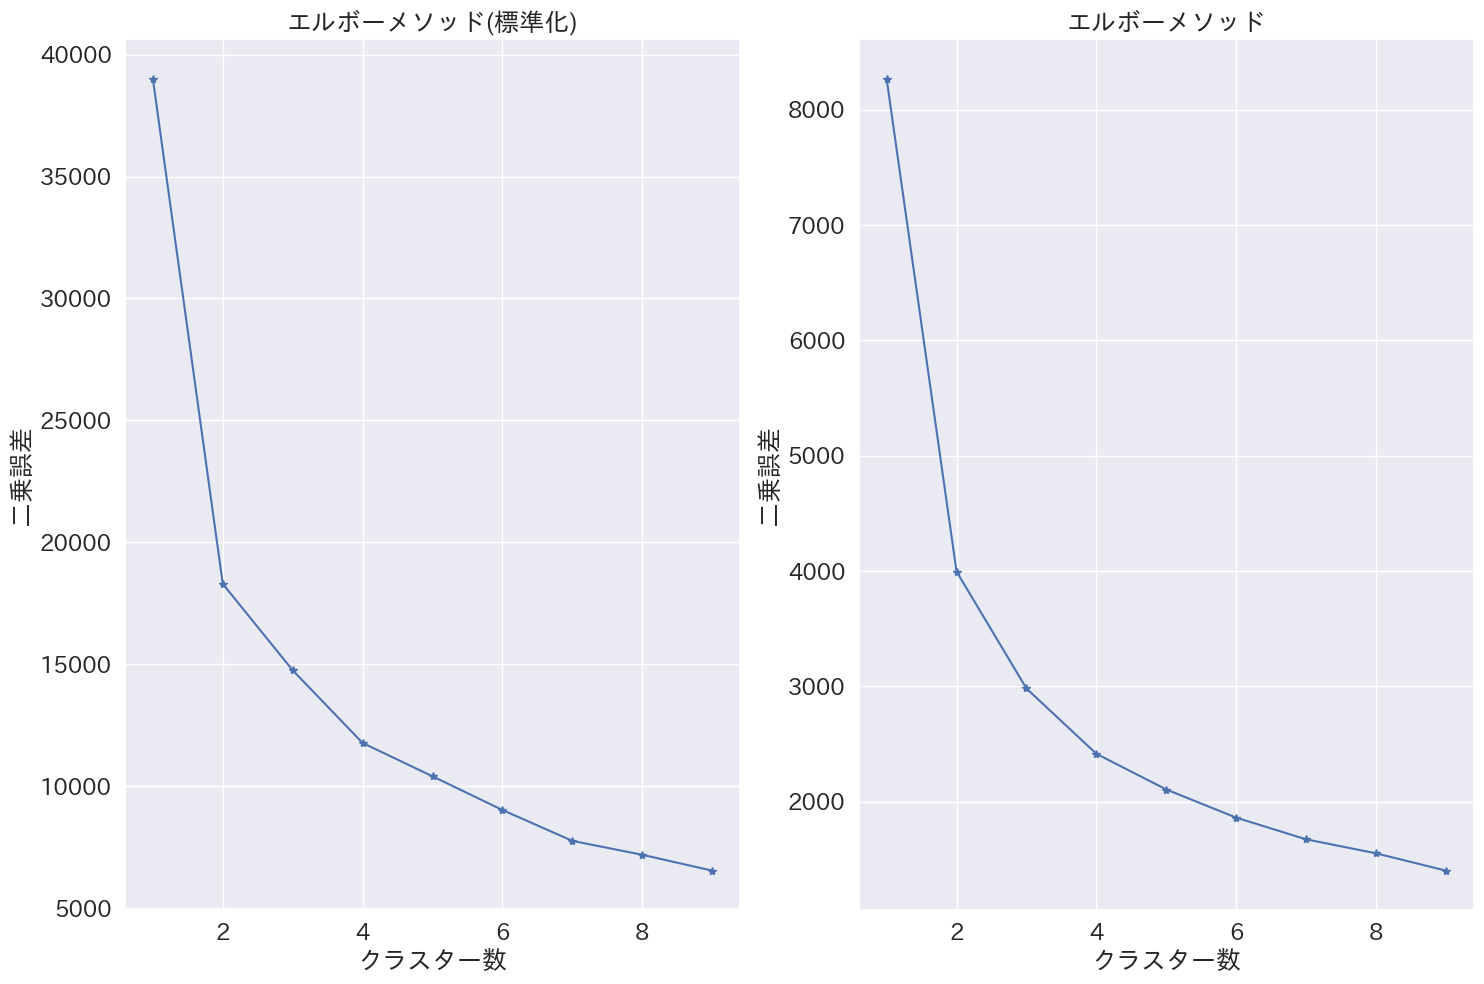

In [71]:
fig = plt.figure(figsize=(15,10), tight_layout=True)

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("エルボーメソッド(標準化)")
ax1.set_xlabel("クラスター数")
ax1.set_ylabel("二乗誤差")
ax1.plot(k_list_std, sse_list_std, marker='*')

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("エルボーメソッド")
ax2.set_xlabel("クラスター数")
ax2.set_ylabel("二乗誤差")
ax2.plot(k_list, sse_list, marker='*')


In [72]:
model = KMeans(n_clusters = 5, random_state=0)
clusters = model.fit(df_score2)
array = clusters.labels_
print(array)
pd.Series(array).value_counts()

[0 4 0 ... 0 1 1]


0    5525
4    1055
1     789
3     384
2      50
dtype: int64

In [73]:
# pd.reset_option("all")
clusters = pd.Series(array, name="クラスタ(スコアのみ)")
clusters

0       0
1       4
2       0
3       4
4       0
       ..
7798    2
7799    0
7800    0
7801    1
7802    1
Name: クラスタ(スコアのみ), Length: 7803, dtype: int32

In [74]:
df_update2_2_or_more = pd.concat([df2_or_more.iloc[:, :-1], clusters], axis=1)
df_update2_2_or_more

,サロン名,名前,総合,雰囲気,接客サービス,技術、仕上がり,メニュー、料金,口コミ本文,性別,年齢,属性,クラスタ,クラスタ(スコアのみ)
0,replay【リプレイ】,mitoさん,5,5,5,5,5,今回も要望通りに応えてくださってありがとうございました！サラツヤになりました。職場でも「いい...,女性,50代,その他,0,0
1,replay【リプレイ】,ni-noさん,5,5,5,5,4,カラーとカットをして頂きました。カラーは白髪ぼかしという感じでハイライトを入れて頂いています...,女性,40代,None,0,4
2,replay【リプレイ】,さっちゃんさん,5,5,5,5,5,今回もありがとうございました！！いつも接客が丁寧で気持ちよく過ごせます。カラーもカットもいい...,女性,20代後半,パート・アルバイト,0,0
3,replay【リプレイ】,あっちゃんさん,5,5,5,5,4,今回はいつもと違うカラーにしていただきました。オリーブグリーン…ちょっとドキドキしましたが、...,女性,60代,None,0,4
4,replay【リプレイ】,Ellieさん,5,5,5,5,5,髪の量を軽やかにカットしていただき、スタイリングと毎日のヘアドライが楽に整えられるようになり...,女性,未設定,None,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7798,beauty:beast 三川町店【ビューティービースト】,ちさん,3,3,3,3,4,要望通りにカットしてくださって満足です。,女性,20代前半,None,2,2
7799,beauty:beast 三川町店【ビューティービースト】,りささん,5,5,5,5,5,先日はありがとうございました。仕上がりもう最高です娘にも自慢して、すごく良いと言われました。...,女性,40代,パート・アルバイト,0,0
7800,beauty:beast 三川町店【ビューティービースト】,いわっこさん,5,5,5,5,5,いつもありがとうございます。白髪染めも綺麗に染まって満足です♪またよろしくお願いします。,女性,40代,None,0,0
7801,coquelicot【コクリコ】,和ちゃんさん,4,4,4,4,4,沢山気をつかわせてしまってごめんなさいスッキリしました。主人に誉められました。ありがとうござ...,女性,50代,None,1,1


             0         1         2  cluster
0    -0.430886  0.072803  0.022502        0
1     0.112191 -0.758869  0.057590        4
2    -0.430886  0.072803  0.022502        0
3     0.112191 -0.758869  0.057590        4
4    -0.430886  0.072803  0.022502        0
...        ...       ...       ...      ...
7798  3.469210  1.406184 -0.042670        2
7799 -0.430886  0.072803  0.022502        0
7800 -0.430886  0.072803  0.022502        0
7801  1.790701  0.323658  0.007460        1
7802  2.742888 -0.185100  0.689022        1

[7803 rows x 4 columns]
pca_df2: 
                   0             1             2      cluster
count  7.803000e+03  7.803000e+03  7.803000e+03  7803.000000
mean  -2.586110e-16 -9.197080e-17 -1.265737e-16     0.802384
std    8.577285e-01  3.896008e-01  2.958247e-01     1.445466
min   -4.308863e-01 -2.422214e+00 -2.067310e+00     0.000000
25%   -4.308863e-01  7.280305e-02  2.250192e-02     0.000000
50%   -4.308863e-01  7.280305e-02  2.250192e-02     0.000000
75%    1.

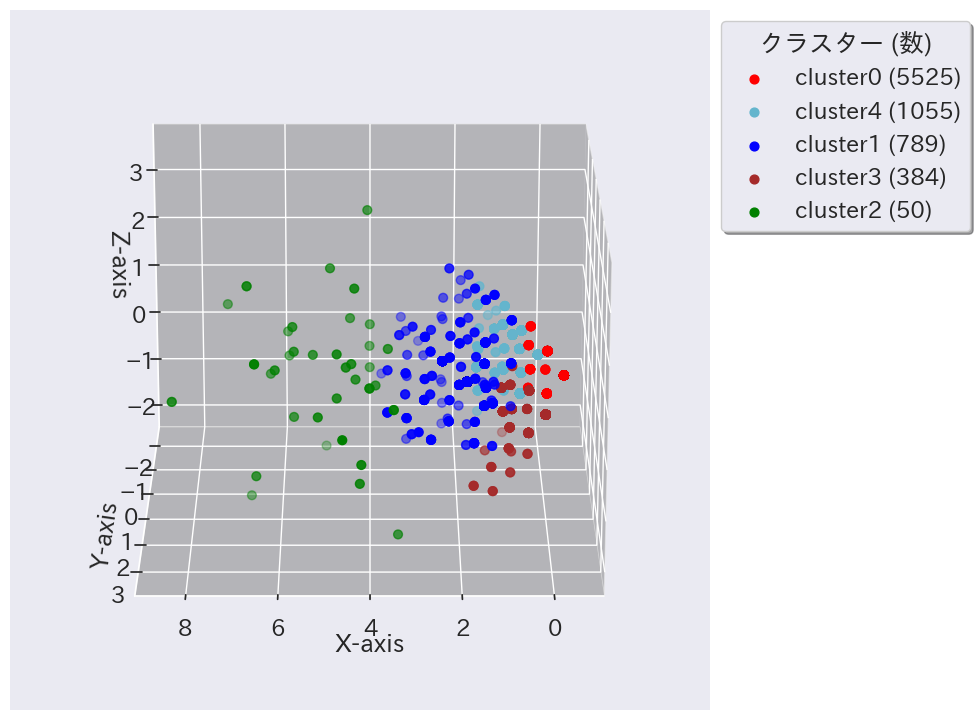

In [75]:
fig = plt.figure(figsize = (20, 20))

# PCAでデータを2次元に削減す

x = df_score2

# 三次元なので次元圧縮後の次元数を3に指定する
pca = PCA(n_components=3)

pca.fit(x)

x_pca = pca.transform(x)

pca_df2 = pd.DataFrame(x_pca)

pca_df2['cluster'] = df_update2_2_or_more["クラスタ(スコアのみ)"].values

print(pca_df2)
print("pca_df2:", "\n" ,pca_df2.describe())
print("pca_df:", "\n",pca_df.describe())

ax = fig.add_subplot(222, projection='3d')

# 視点角度を調整する

ax.view_init(elev=20, azim=90)

color_list = ["red","blue","green","brown", "c","grey","red","green", "darkblue"]

print()

for i in pca_df2['cluster'].unique():
    tmp = pca_df2.loc[pca_df2['cluster'] == i]
    print(f"cluster{i}", len(tmp))
    sc = ax.scatter(tmp[0], tmp[1], tmp[2], color=color_list[i], s=40, label=f'cluster{i} ({len(tmp)})')
    
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")    

ax.xaxis.pane.set_facecolor("grey")
ax.yaxis.pane.set_facecolor("grey")
ax.zaxis.pane.set_facecolor("grey")

ax.legend(loc="upper left", title='クラスター (数)', shadow=True, bbox_to_anchor=(1, 1)) 

plt.show()

In [76]:
df_update2_2_or_more.年齢.value_counts().values.tolist()[:-3]

[1637, 1391, 1344, 1059, 911, 865, 408, 161]

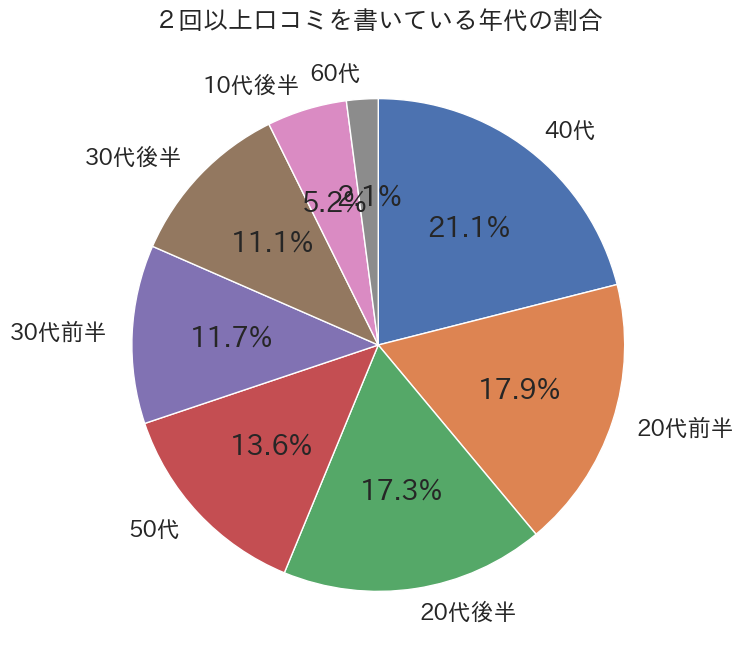

In [77]:
plt.figure(figsize=(10,8))
plt.rcParams['font.size'] = 20 #pltの文字の大きさの調整
plt.pie(df_update2_2_or_more.年齢.value_counts().values.tolist()[:-3], 
        labels=df_update2_2_or_more.年齢.value_counts().index[:-3],
        counterclock=False,startangle=90, autopct="%1.1f%%"
        )
plt.title("２回以上口コミを書いている年代の割合")
plt.show()